#### HW5

##### 8.4 Q3

In [ ]:
# pmk = proportion of training observations in m(th) region from k(th) class
# In a setting with two classes K=2
# pm1 = 1- pm2
# Classification error (E) = 1 - max pmk
# When 1 > pm2 > 0.5 [Class 1 is most common] i.e E = 1 - pmk1
# When 0.5 > pm2 > 0 [Class 1 is least common] i.e E = 1 - pmk2 = 1 - (1 - pm1)

# Gini index:
# G = Summation from k=1 to K (pmk * (1 - pmk))
# For pm1, G = 2pm1(1-pm1)

# Cross Entropy:
# D = -1 * summation of k=1 to K pmk log pmk
# for pm1, D = -1 * pm1 log pm1 - {(1 - pm1) * log (1 - pm1)} (this is binary cross entropy)

### Definitions:
- `pmk`: Proportion of training observations in the m<sup>th</sup> region from the k<sup>th</sup> class.
- In scenarios with two classes (`K=2`):
  - `pm1 = 1 - pm2`

### Classification Error (E):
Classification error is calculated as the complement of the maximum proportion of class observations within a region:
- **When `1 > pm2 > 0.5`** (Class 1 is most common):
  - `E = 1 - pm1`
- **When `0.5 > pm2 > 0`** (Class 1 is least common):
  - `E = 1 - pm2`
  - Simplifies to `E = 1 - (1 - pm1)`

### Gini Index:
The Gini index for a binary classification scenario is calculated as:
- `G = Summation from k=1 to K of (pmk * (1 - pmk))`
- For `pm1`, this formula simplifies to:
  - `G = 2 * pm1 * (1 - pm1)`

### Cross Entropy (D):
Cross entropy, particularly binary cross entropy for two classes, is defined as:
- `D = -1 * summation of k=1 to K of (pmk * log(pmk))`
- For `pm1`, this becomes:
  - `D = -1 * (pm1 * log(pm1) + (1 - pm1) * log(1 - pm1)) (this is binary cross entropy)`

In [ ]:
p1=seq(0,1,0.2)

In [ ]:
p1

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [ ]:
pmax(p1,1 - p1)

[1] 1.0 0.8 0.6 0.6 0.8 1.0

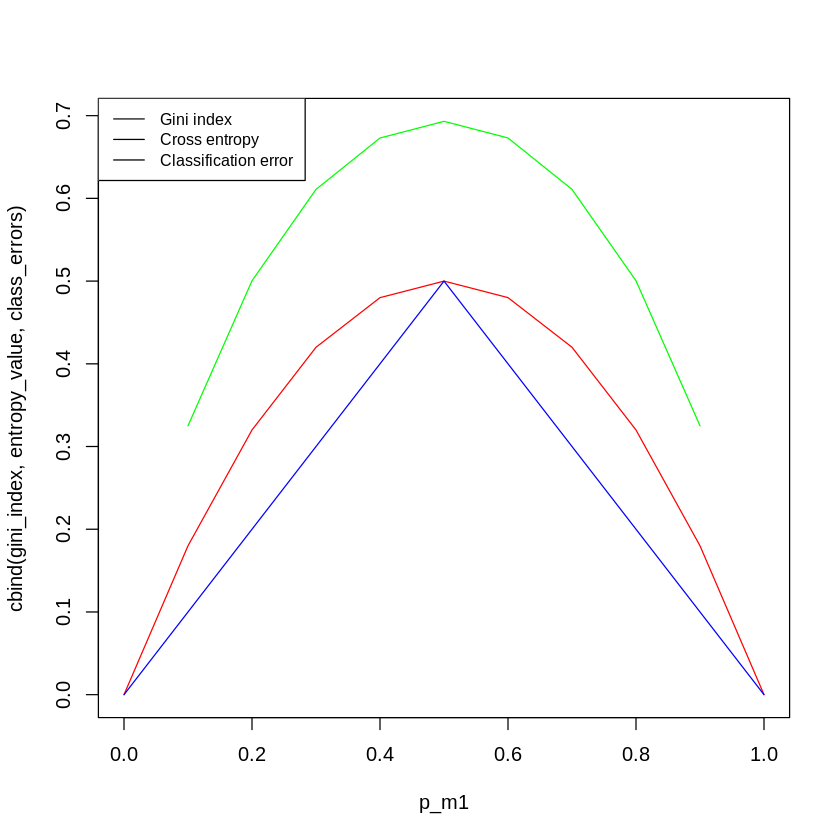

In [ ]:
pm1=seq(0,1,0.1)
pm2=(1-pm1)
gini_index=2 * pm1 * pm2
entropy_value= -( (pm1 * log(pm1)) + (pm2 * log(pm2)))
class_errors=1 - pmax(pm1,pm2)
matplot(p_m1,cbind(gini_index,entropy_value,class_errors),col=c("red","green","blue"),type='l',lty=1,bg="white",cex=0.8)
legend("topleft",c("Gini index","Cross entropy","Classification error"),lty=1,bg="white",box.lwd=1,cex=0.8)

##### 8.4 Q9

In [ ]:
install.packages(c("ISLR","MASS","tree"))
library(ISLR)
library(MASS)
library(tree)
set.seed(123)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
sum(is.na(OJ))

[1] 0

In [ ]:
names(OJ)

[1] "Purchase"       "WeekofPurchase" "StoreID"        "PriceCH"       
 [5] "PriceMM"        "DiscCH"         "DiscMM"         "SpecialCH"     
 [9] "SpecialMM"      "LoyalCH"        "SalePriceMM"    "SalePriceCH"   
[13] "PriceDiff"      "Store7"         "PctDiscMM"      "PctDiscCH"     
[17] "ListPriceDiff"  "STORE"

###### (a)

In [ ]:
test_index=sample(nrow(OJ),270,replace=FALSE)
train_set=OJ[-test_index,]
test_set=OJ[test_index,]
print(c(nrow(train_set),nrow(test_set),nrow(train_set)+nrow(test_set),nrow(OJ)))

[1]  800  270 1070 1070


###### (b)

In [ ]:
tree_fit_oj=tree(Purchase~.,data=train_set)

In [ ]:
summary(tree_fit_oj)


Classification tree:
tree(formula = Purchase ~ ., data = train_set)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SalePriceMM"   "ListPriceDiff"
[5] "StoreID"      
Number of terminal nodes:  8 
Residual mean deviance:  0.7304 = 578.5 / 792 
Misclassification error rate: 0.1725 = 138 / 800 

###### (c)

In [ ]:
tree_fit_oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 346  408.70 MM ( 0.27746 0.72254 )  
     4) LoyalCH < 0.280875 156  107.40 MM ( 0.10897 0.89103 ) *
     5) LoyalCH > 0.280875 190  258.00 MM ( 0.41579 0.58421 )  
      10) PriceDiff < 0.195 82   88.78 MM ( 0.23171 0.76829 ) *
      11) PriceDiff > 0.195 108  148.40 CH ( 0.55556 0.44444 ) *
   3) LoyalCH > 0.5036 454  358.30 CH ( 0.86564 0.13436 )  
     6) SalePriceMM < 2.125 260  276.00 CH ( 0.77692 0.22308 )  
      12) LoyalCH < 0.764572 125  167.40 CH ( 0.60800 0.39200 )  
        24) ListPriceDiff < 0.235 67   92.15 MM ( 0.44776 0.55224 ) *
        25) ListPriceDiff > 0.235 58   59.14 CH ( 0.79310 0.20690 )  
          50) StoreID < 2.5 21   29.06 CH ( 0.52381 0.47619 ) *
          51) StoreID > 2.5 37   15.56 CH ( 0.94595 0.05405 ) *
      13) LoyalCH > 0.764572 135   66.13 CH ( 0.93333 0.06667 ) *
     7) SalePriceMM > 2.125 194   30.97 

###### (d)

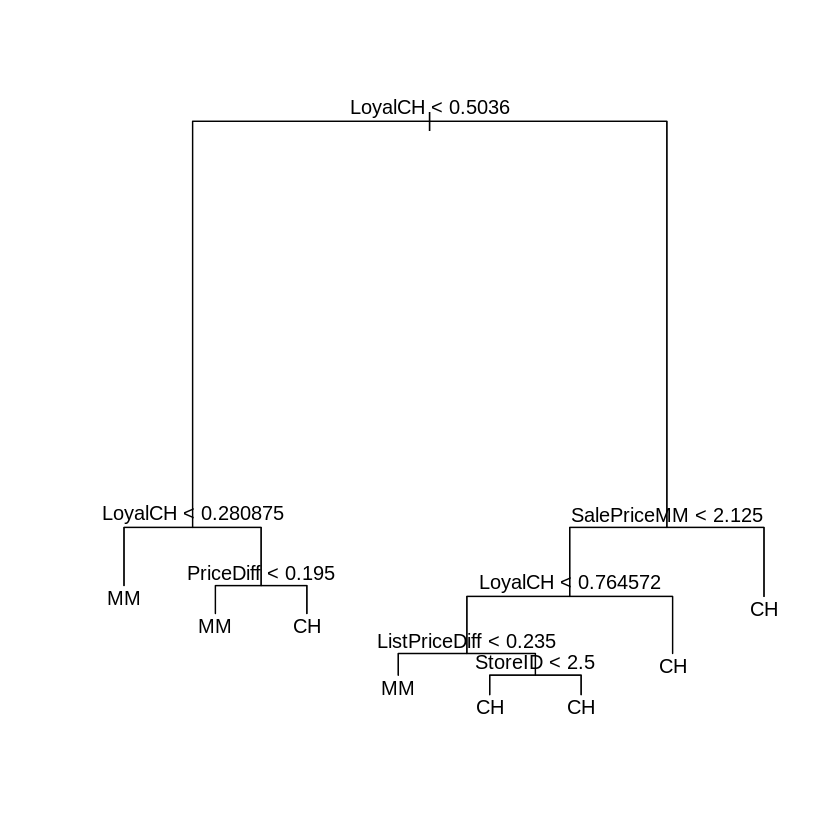

In [ ]:
plot(tree_fit_oj)
text(tree_fit_oj,pretty=0)

###### (e)

In [ ]:
pred_tree_fit_oj=predict(tree_fit_oj,newdata=test_set,type="class")
# Confusion Matrix
print(table(test_set[,"Purchase"],pred_tree_fit_oj))

    pred_tree_fit_oj
      CH  MM
  CH 131  33
  MM  19  87


In [ ]:
# Miss Classification Rate
round((1 - ( (131 + 87) / (131 + 33 + 19 + 87)))*100,2)

[1] 19.26

###### (f)

In [ ]:
cv_tree_fit_oj=cv.tree(tree_fit_oj,FUN=prune.tree)

###### (g)

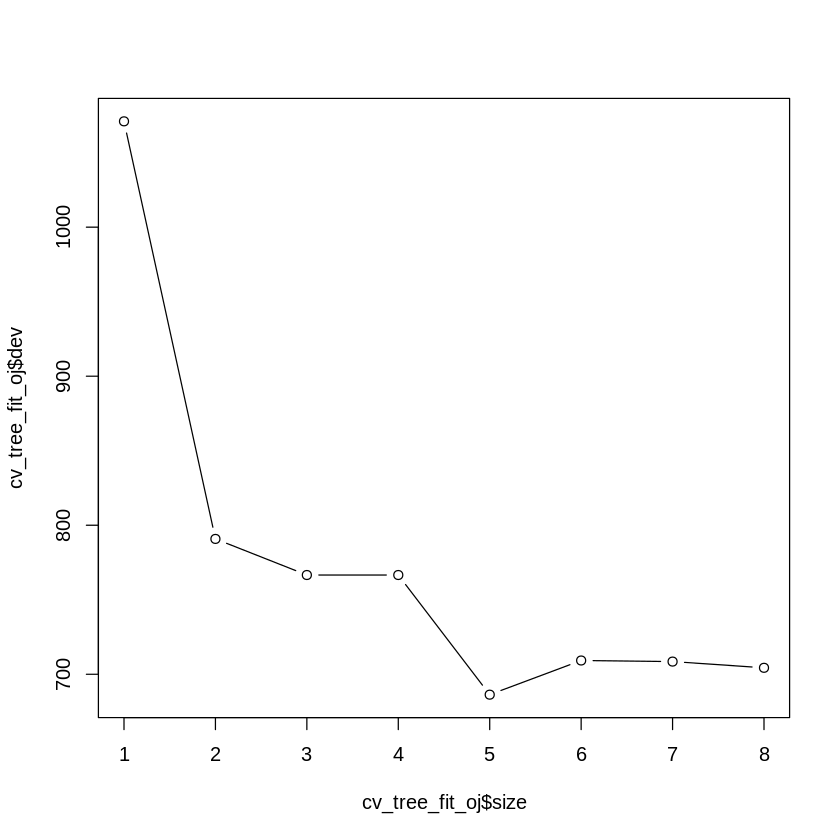

In [ ]:
plot(cv_tree_fit_oj$size,cv_tree_fit_oj$dev,type="b")

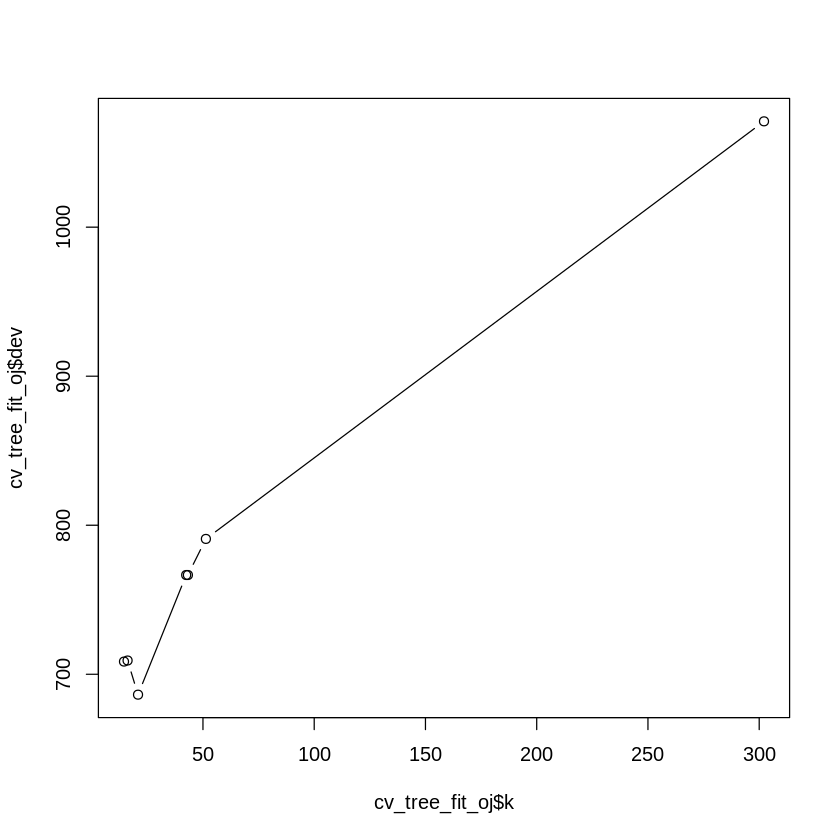

In [ ]:
plot(cv_tree_fit_oj$k,cv_tree_fit_oj$dev,type="b")

###### (h)

In [ ]:
cv_tree_fit_oj$dev

[1]  704.3348  708.5129  709.2366  686.3106  766.5974  766.5974  790.8157
[8] 1071.0127

In [ ]:
order(cv_tree_fit_oj$dev,decreasing=TRUE)

[1] 8 7 5 6 3 2 1 4

In [ ]:
cv_tree_fit_oj$dev[order(cv_tree_fit_oj$dev,decreasing=TRUE)]

[1] 1071.0127  790.8157  766.5974  766.5974  709.2366  708.5129  704.3348
[8]  686.3106

In [ ]:
which.min(cv_tree_fit_oj$dev)

[1] 4

In [ ]:
cv_tree_fit_oj$size

[1] 8 7 6 5 4 3 2 1

In [ ]:
cv_tree_fit_oj$size[which.min(cv_tree_fit_oj$dev)]

[1] 5

In [ ]:
cv_tree_fit_oj$size[5]

[1] 4

###### (i)

In [ ]:
# Best size=4
pruned_tree_fit_oj=prune.tree(tree_fit_oj,best=4)

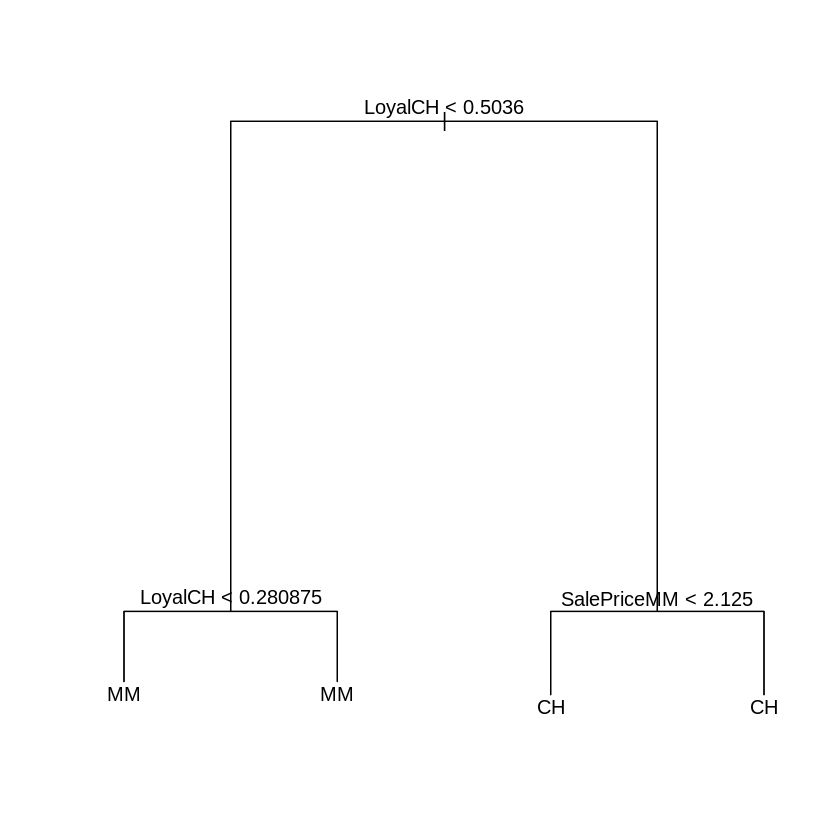

In [ ]:
plot(pruned_tree_fit_oj)
text(pruned_tree_fit_oj,pretty=0)

###### (j)

In [ ]:
summary(pruned_tree_fit_oj)


Classification tree:
snip.tree(tree = tree_fit_oj, nodes = 5:6)
Variables actually used in tree construction:
[1] "LoyalCH"     "SalePriceMM"
Number of terminal nodes:  4 
Residual mean deviance:  0.8447 = 672.4 / 796 
Misclassification error rate: 0.1962 = 157 / 800 

###### (k)

In [ ]:
pred_pruned_tree_fit_oj=predict(pruned_tree_fit_oj,newdata=test_set,type="class")
# Confusion Matrix
print(table(test_set[,"Purchase"],pred_pruned_tree_fit_oj))

    pred_pruned_tree_fit_oj
      CH  MM
  CH 127  37
  MM  20  86


In [ ]:
# Miss Classification Rate
round((1 - ( (127 + 86) / (127 + 37 + 20 + 86)))*100,2)

[1] 21.11

##### 9.7 Q2

###### (a)

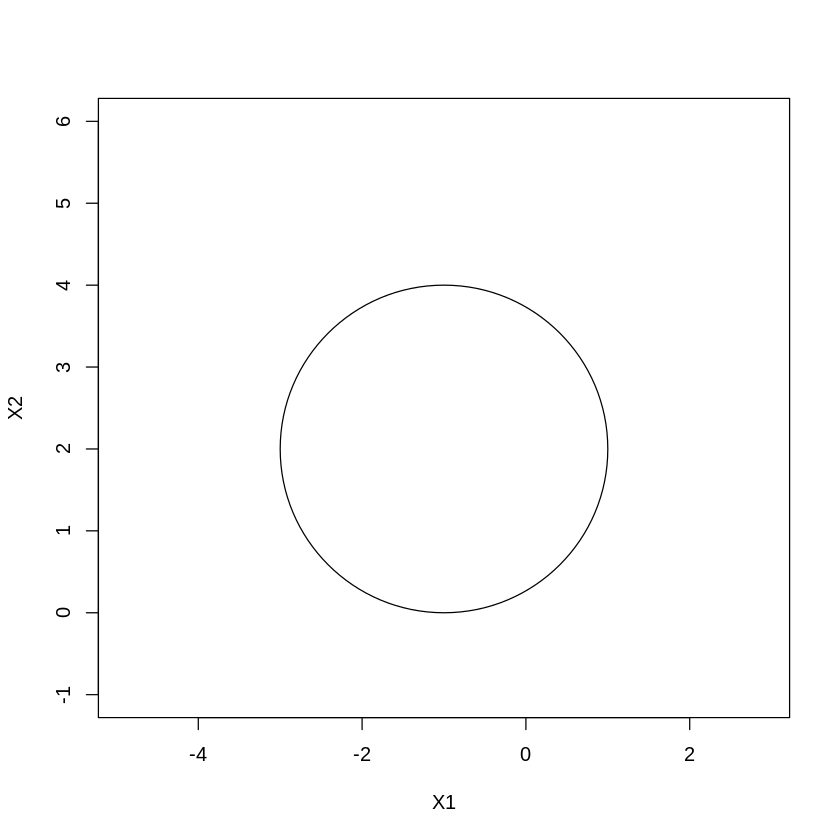

In [ ]:
radius=2
plot(NA,NA,type="n",xlim=c(-4,2),ylim=c(-1,6),asp=1,xlab="X1",ylab="X2")
symbols(c(-1),c(2),circles=c(radius),add=TRUE,inches=FALSE)

###### (b)

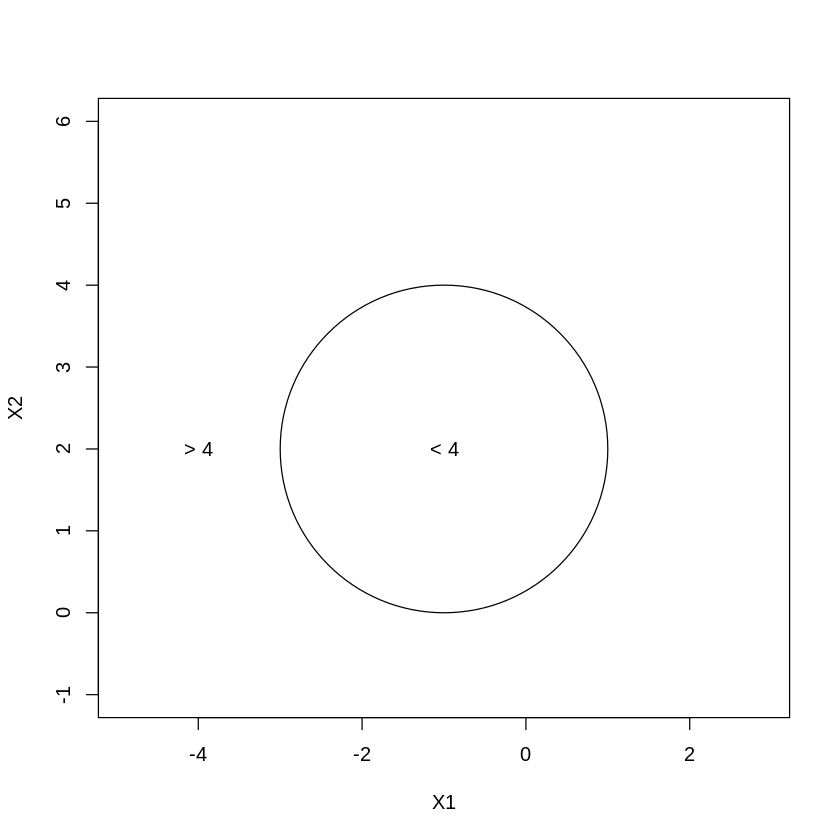

In [ ]:
radius=2
plot(NA,NA,type="n",xlim=c(-4,2),ylim=c(-1,6),asp=1,xlab="X1",ylab="X2")
symbols(c(-1),c(2),circles=c(radius),add=TRUE,inches=FALSE)
text(c(-1),c(2),"< 4")
text(c(-4),c(2),"> 4")

###### (c)

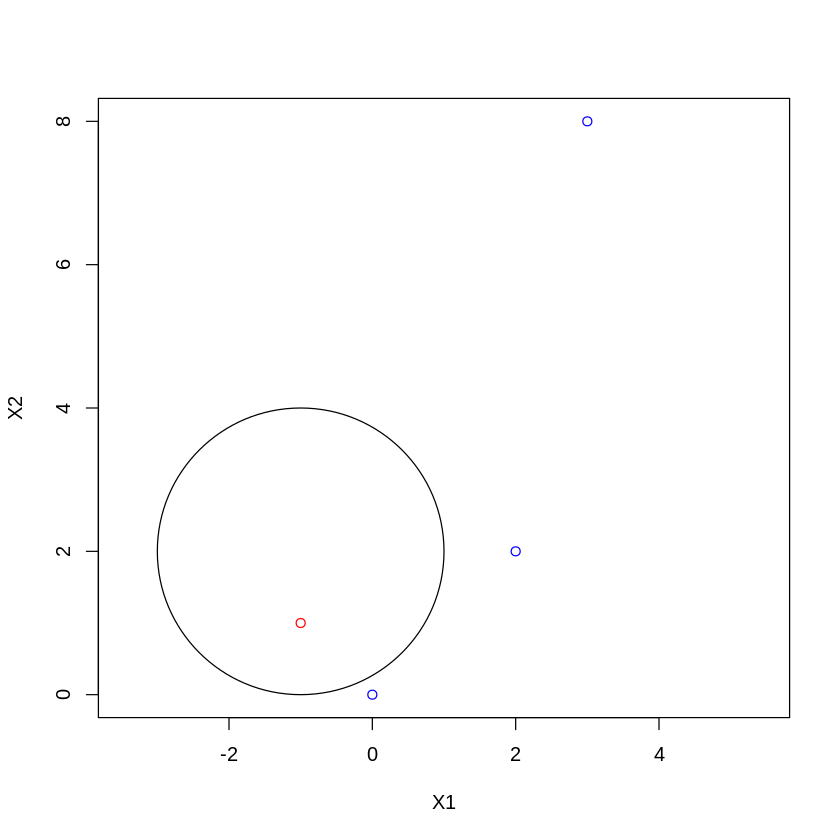

In [ ]:
radius=2
plot(c(0,-1,2,3),c(0,1,2,8),col=c("blue","red","blue","blue"),type="p",asp=1,xlab="X1",ylab="X2")
symbols(c(-1),c(2),circles=c(radius),add=TRUE,inches=FALSE)

##### 9.7 Q4

In [ ]:
install.packages("e1071")
library(e1071)
set.seed(123)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




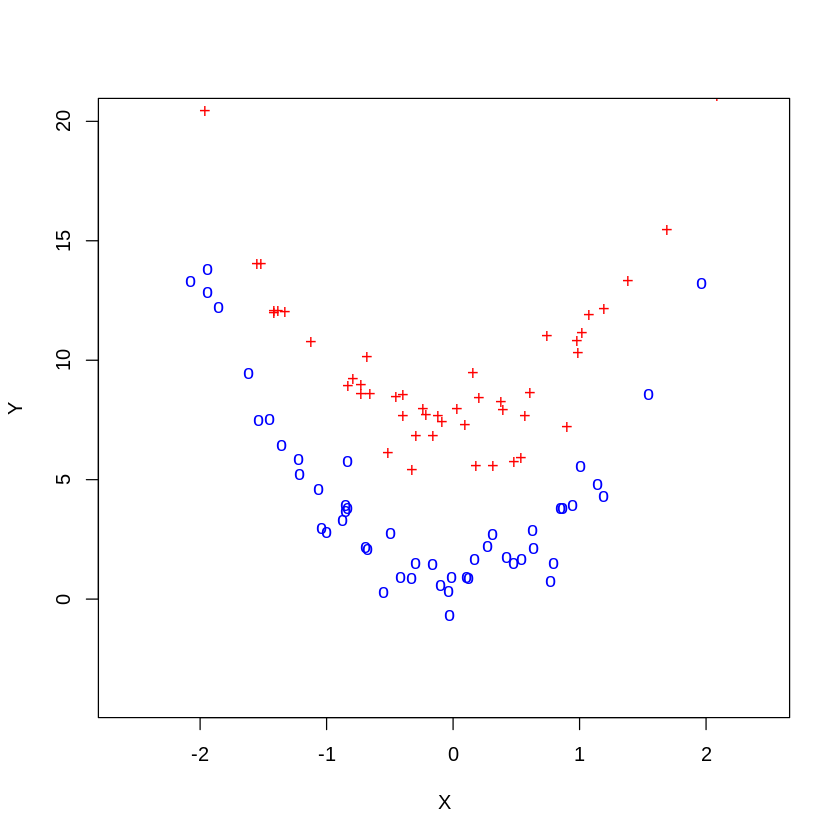

In [ ]:
# y=3(x^2) + 4
x=rnorm(100)
y=3 * (x^2) + 4 + rnorm(100)
z=rep(0,100)

temp_train_index=sample(100,50)
y[temp_train_index]=y[temp_train_index] + 3
y[-temp_train_index]=y[-temp_train_index] - 3
z[temp_train_index]=1

plot(x[temp_train_index],y[temp_train_index],pch="+",lwd=4,col="red",ylim=c(-4,20),xlab="X",ylab="Y")
points(x[-temp_train_index],y[-temp_train_index],pch="o",lwd=4,col="blue")

train_index=c(sample(temp_train_index,25),sample(setdiff(1:100,temp_train_index),25))
train_set=data.frame(x=x[train_index],y=y[train_index],z=as.factor(z[train_index]))
test_set=data.frame(x=x[-train_index],y=y[-train_index],z=as.factor(z[-train_index]))

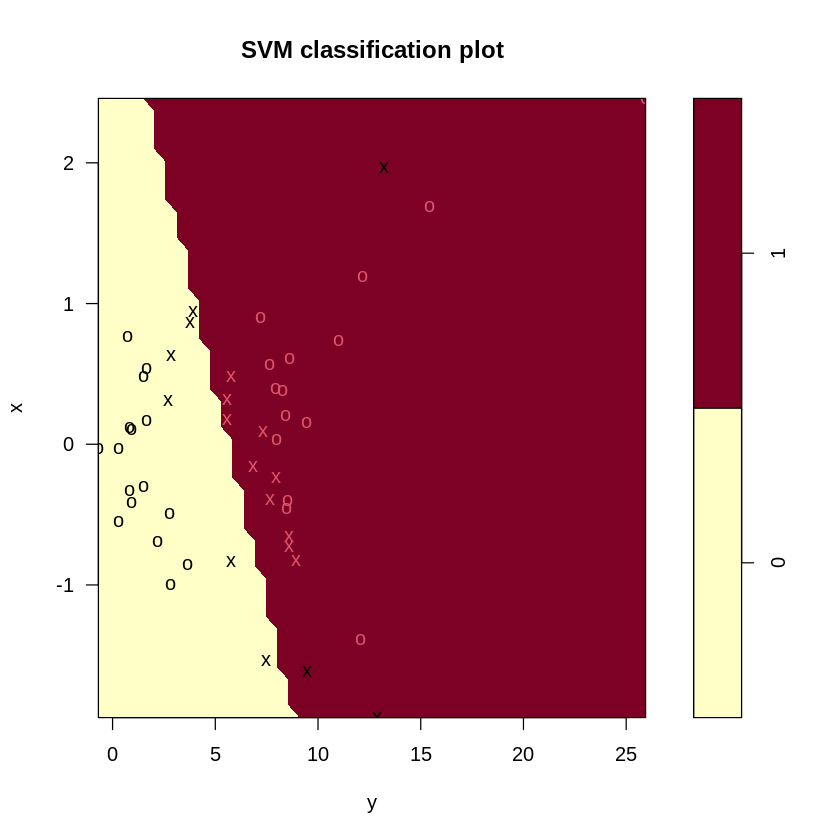

In [ ]:
# Linear SVM
svm_linear_fit=svm(z~.,data=train_set,kernel="linear",cost=10)
plot(svm_linear_fit,train_set)

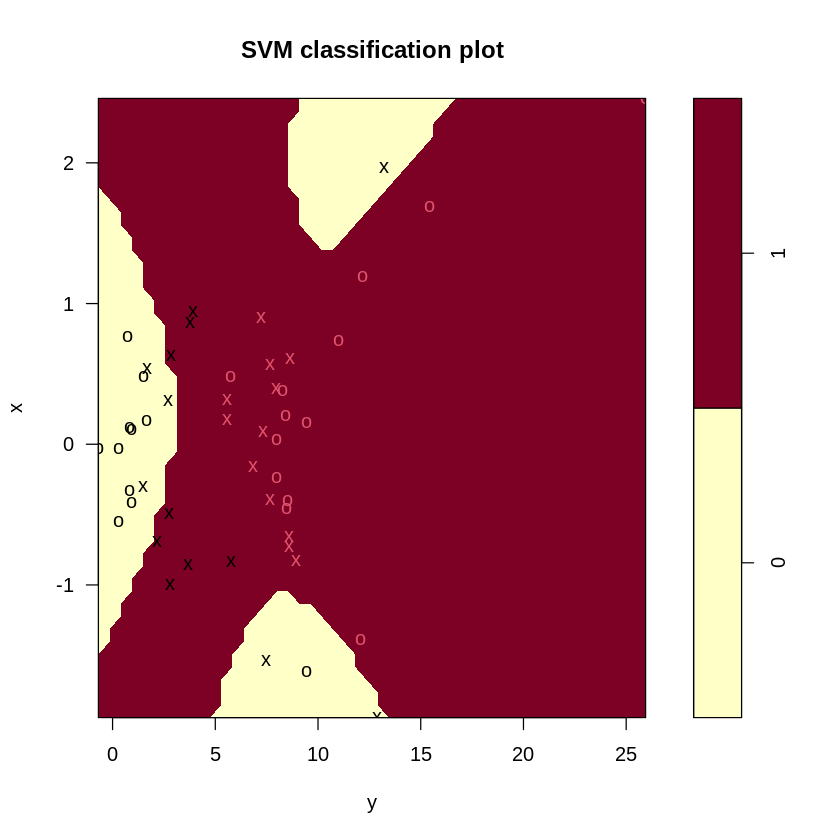

In [ ]:
# Polynomial SVM
svm_polynomial_fit=svm(z~.,data=train_set,kernel="polynomial",cost=10)
plot(svm_polynomial_fit,train_set)

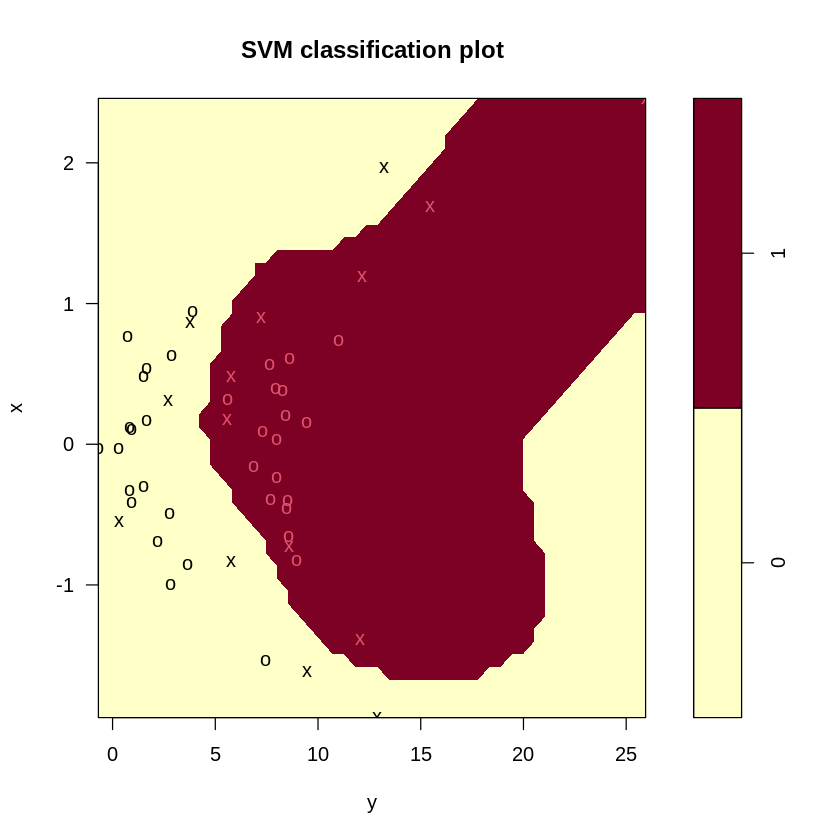

In [ ]:
# Radial SVM
svm_radial_fit=svm(z~.,data=train_set,kernel="radial",cost=10,gamma=1)
plot(svm_radial_fit,train_set)

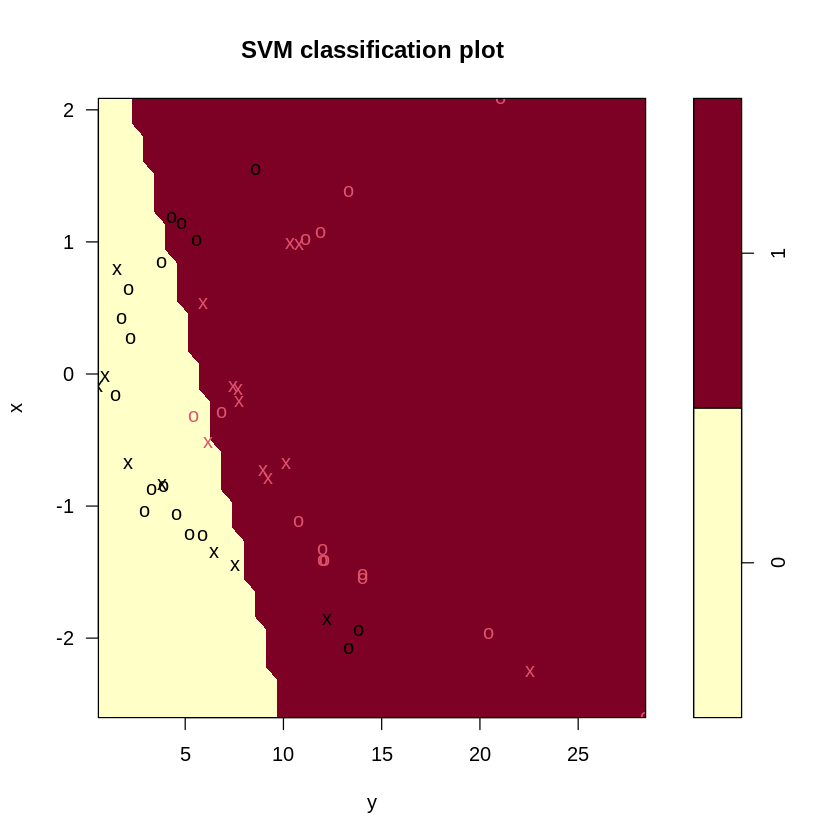

In [ ]:
plot(svm_linear_fit,test_set)

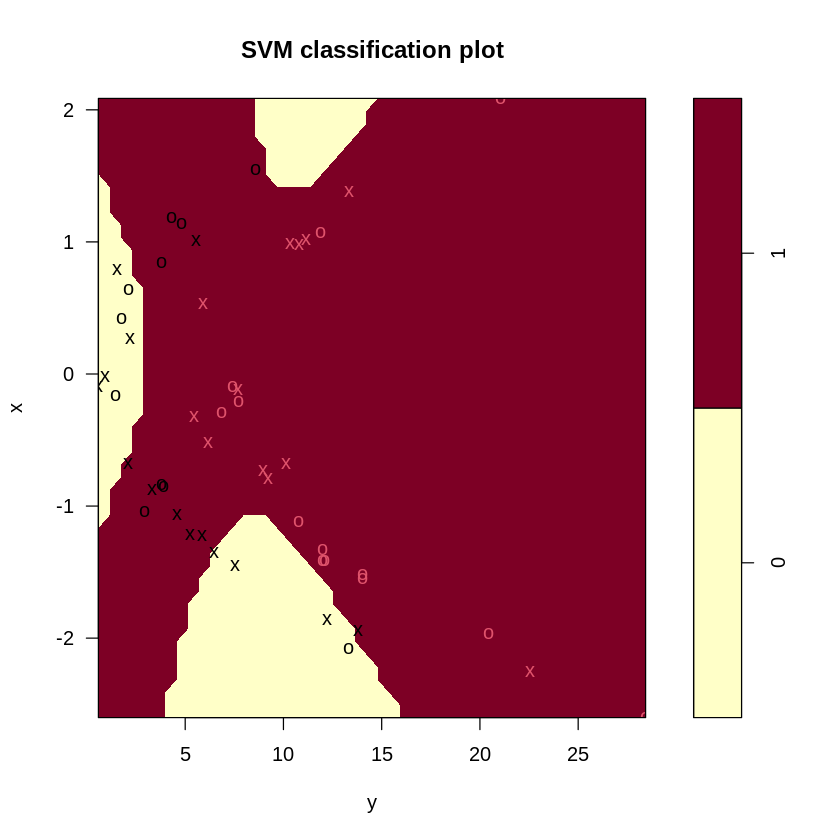

In [ ]:
plot(svm_polynomial_fit,test_set)

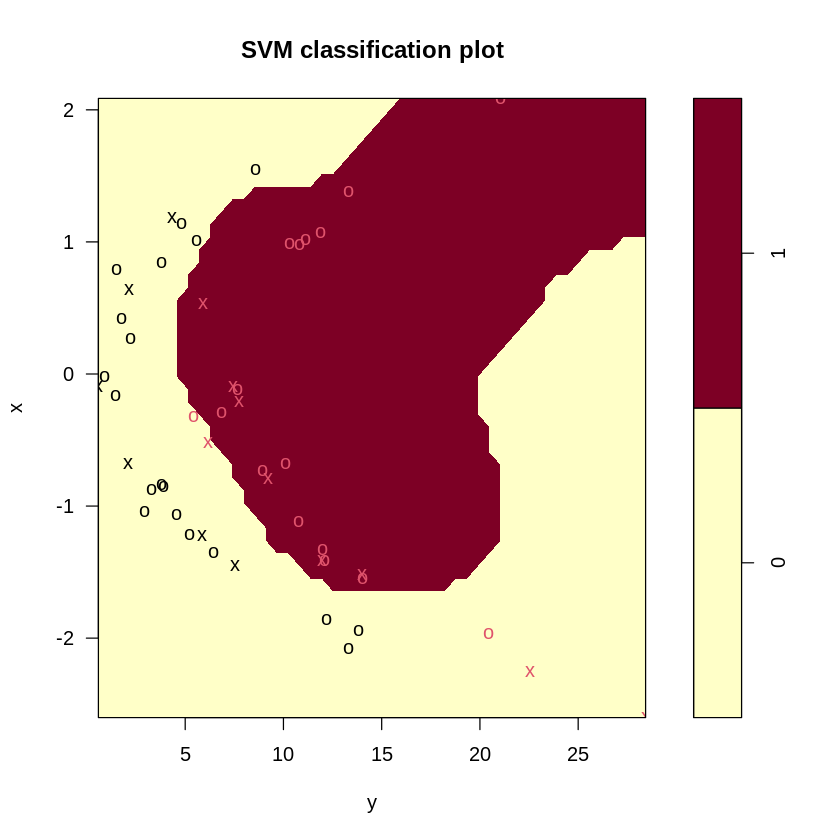

In [ ]:
plot(svm_radial_fit,test_set)

In [ ]:
# Linear SVM Confusion Matrix - Train
print(table(z[train_index],predict(svm_linear_fit,train_set)))

   
     0  1
  0 21  4
  1  0 25


In [ ]:
# Linear SVM Miss Classification Rate - Train
round((1 - ( (21 + 25) / (21 + 4 + 25)))*100,2)

[1] 8

In [ ]:
# Polynomial SVM Confusion Matrix - Train
print(table(z[train_index],predict(svm_polynomial_fit,train_set)))

   
     0  1
  0 17  8
  1  0 25


In [ ]:
# Polynomial SVM Miss Classification Rate - Train
round((1 - ( (17 + 25) / (17 + 8 + 25)))*100,2)

[1] 16

In [ ]:
# Radial SVM Confusion Matrix - Train
print(table(z[train_index],predict(svm_radial_fit,train_set)))

   
     0  1
  0 25  0
  1  0 25


In [ ]:
# Radial SVM Miss Classification Rate - Train
round((1 - ( (25 + 25) / (25 + 25)))*100,2)

[1] 0

In [ ]:
# Linear SVM Confusion Matrix - Test
print(table(z[-train_index],predict(svm_linear_fit,test_set)))

   
     0  1
  0 18  7
  1  2 23


In [ ]:
# Linear SVM Miss Classification Rate - Test
round((1 - ( (18 + 23) / (18 + 7 + 2 + 23)))*100,2)

[1] 18

In [ ]:
# Polynomial SVM Confusion Matrix - Test
print(table(z[-train_index],predict(svm_polynomial_fit,test_set)))

   
     0  1
  0 10 15
  1  0 25


In [ ]:
# Polynomial SVM Miss Classification Rate - Test
round((1 - ( (10 + 25) / (10 + 15 + 25)))*100,2)

[1] 30

In [ ]:
# Radial SVM Confusion Matrix - Test
print(table(z[-train_index],predict(svm_radial_fit,test_set)))

   
     0  1
  0 25  0
  1  4 21


In [ ]:
# Radial SVM Miss Classification Rate - Test
round((1 - ( (25 + 21) / (25 + 4 + 21)))*100,2)

[1] 8

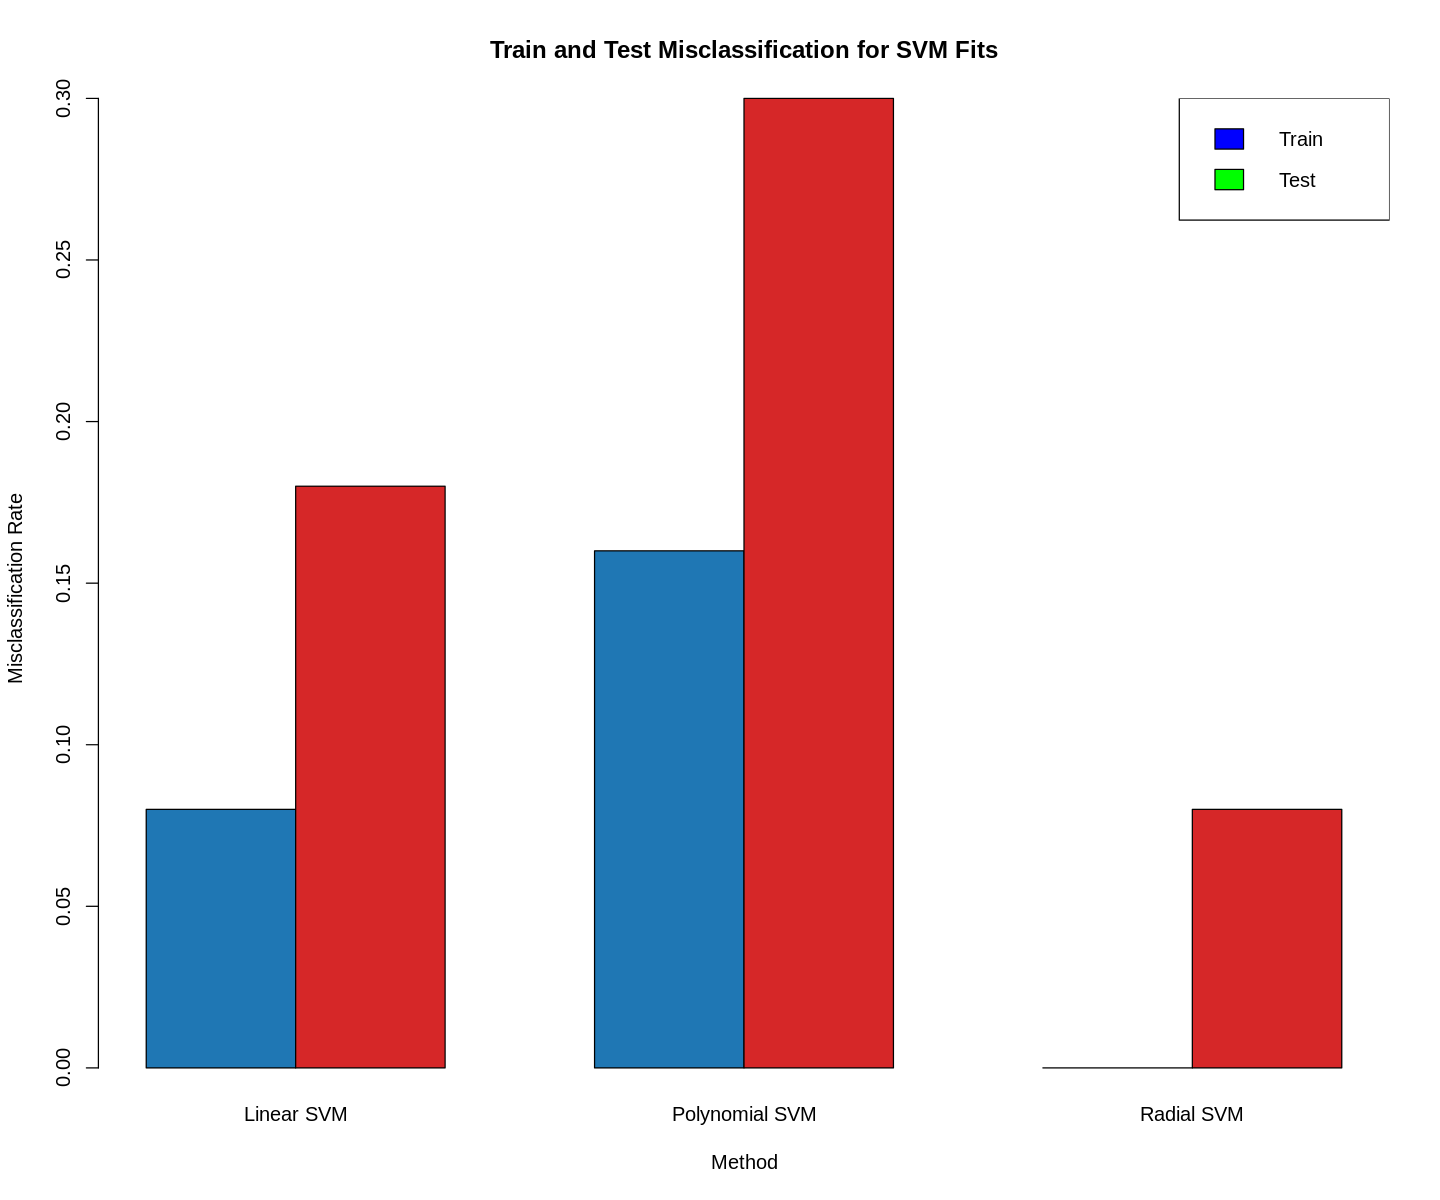

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

svm_result_df=data.frame(
  Method=c("Linear SVM","Polynomial SVM","Radial SVM"),
  Train_Misclassification=c(0.08,0.16,0.0),
  Test_Misclassification=c(0.18,0.30,0.08)
  )

barplot(
  t(as.matrix(svm_result_df[,-1])),
  beside=TRUE,
  col=c("#1f77b4","#d62728"),
  names.arg = svm_result_df$Method,
  xlab="Method",
  ylab="Misclassification Rate",
  main="Train and Test Misclassification for SVM Fits"
  )
legend("topright",legend=c("Train","Test"),fill=c("blue","green"))

##### 9.7 Q5

In [ ]:
install.packages(c('glmnet','e1071'))
library(glmnet)
library(e1071)
set.seed(123)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘proxy’


Loading required package: Matrix

Loaded glmnet 4.1-8



###### (a)

In [ ]:
x1=runif(500) - 0.5
x2=runif(500) - 0.5
y=1 * (x1^2 - x2^2 > 0)

###### (b)

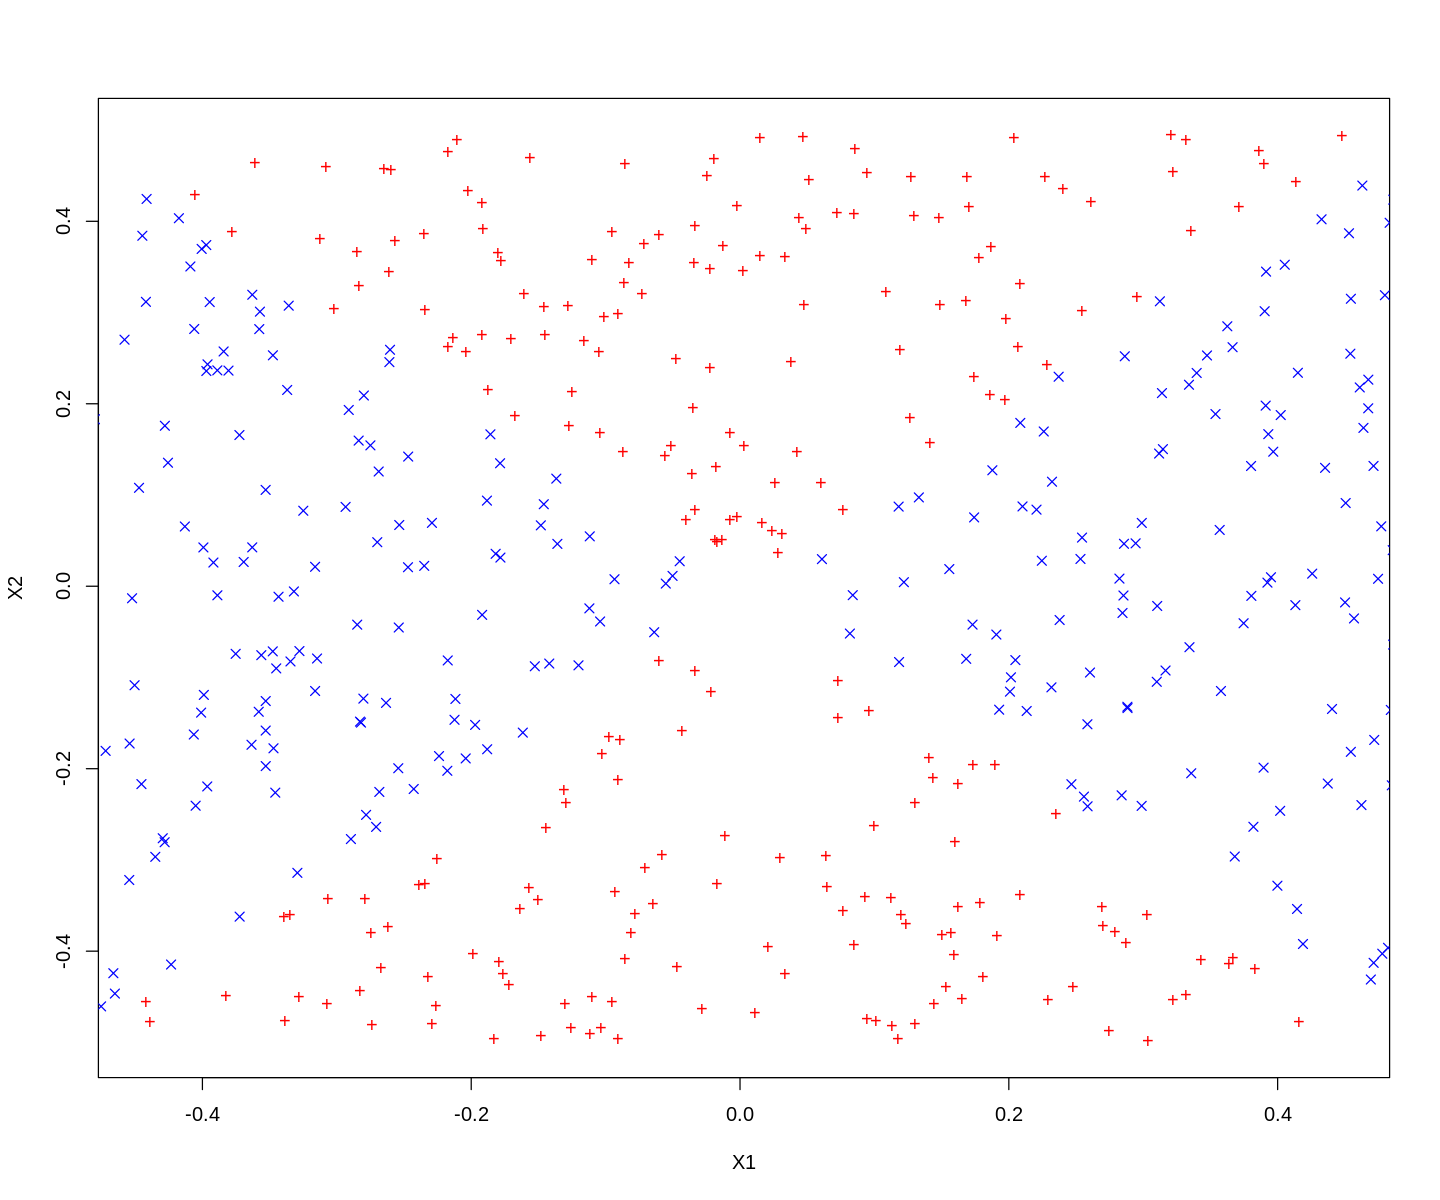

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

plot(x1[y == 0],x2[y == 0],col="red",xlab="X1",ylab="X2",pch="+")
points(x1[y == 1],x2[y == 1],col="blue",pch=4)

###### (c)

In [ ]:
log_model_fit=glm(y ~ x1 + x2,family="binomial")
summary(log_model_fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.04792    0.08949   0.535    0.592
x1          -0.03999    0.31516  -0.127    0.899
x2           0.11509    0.30829   0.373    0.709

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.86  on 499  degrees of freedom
Residual deviance: 692.71  on 497  degrees of freedom
AIC: 698.71

Number of Fisher Scoring iterations: 3


In [ ]:
log_model_fit


Call:  glm(formula = y ~ x1 + x2, family = "binomial")

Coefficients:
(Intercept)           x1           x2  
    0.04792     -0.03999      0.11509  

Degrees of Freedom: 499 Total (i.e. Null);  497 Residual
Null Deviance:	    692.9 
Residual Deviance: 692.7 	AIC: 698.7

###### (d)

In [ ]:
df=data.frame(x1=x1,x2=x2,y=y)

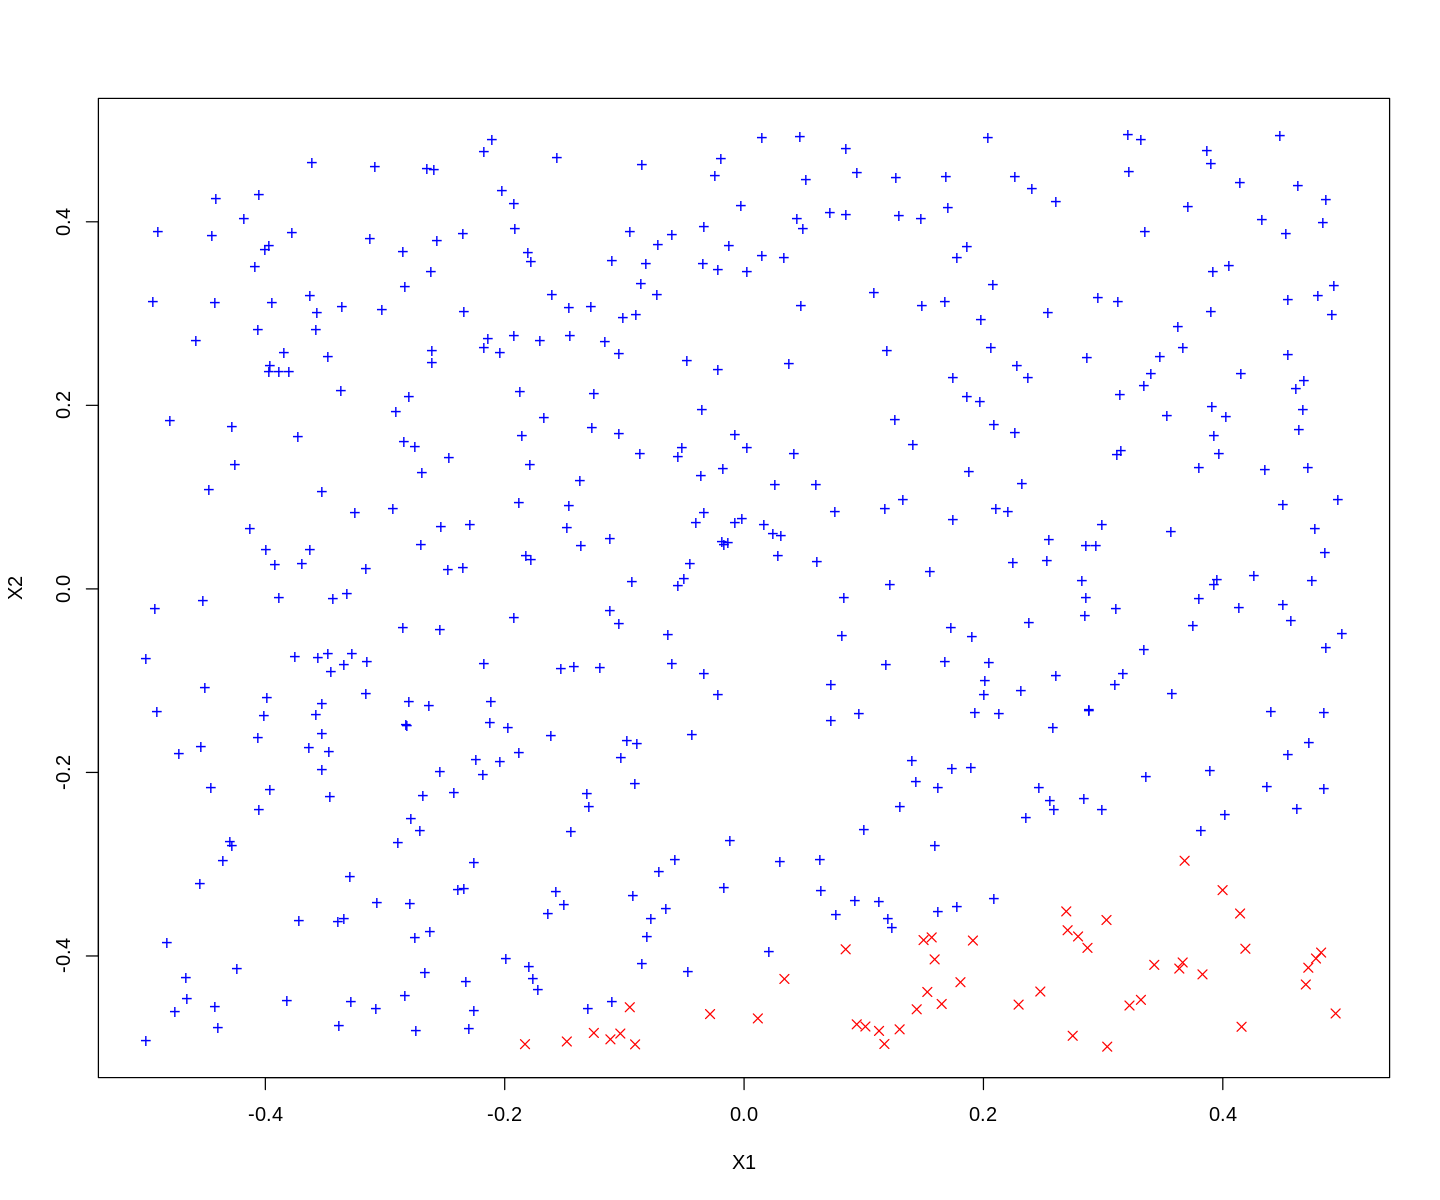

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

log_model_prob=predict(log_model_fit,df,type="response")
log_model_pred=ifelse(log_model_prob > 0.5,1,0)
pos_data=df[log_model_pred == 1,]
neg_data=df[log_model_pred == 0,]
plot(pos_data$x1,pos_data$x2,col="blue",xlab="X1",ylab="X2",pch="+")
points(neg_data$x1,neg_data$x2,col="red",pch=4)

In [ ]:
# Logistic Regression Confusion Matrix - Train
print(table(df[,"y"],log_model_pred))

   log_model_pred
      0   1
  0  40 204
  1   9 247


In [ ]:
# Logistic Regression Miss Classification Rate - Train
round((1 - ( (40 + 247) / (40 + 204 + 9 + 247)))*100,2)

[1] 42.6

###### (e)

In [ ]:
log_model_non_linear_fit=glm(y ~ poly(x1,2) + poly(x2,2) + log(x1 + 1e-10) + log (x2 + 1e-10) + I(x1 * x2),data=df,family="binomial",maxit=1000)

Warning message in log(x1 + 1e-10):
“NaNs produced”
Warning message in log(x2 + 1e-10):
“NaNs produced”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
log_model_non_linear_fit=glm(y ~ poly(x1,2) + poly(x2,2) + I(x1 * x2),data=df,family="binomial",maxit=1000)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
log_model_non_linear_fit


Call:  glm(formula = y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial", 
    data = df, maxit = 1000)

Coefficients:
 (Intercept)  poly(x1, 2)1  poly(x1, 2)2  poly(x2, 2)1  poly(x2, 2)2  
      -82.36        785.50      31563.15       3253.10     -32794.06  
  I(x1 * x2)  
      861.31  

Degrees of Freedom: 499 Total (i.e. Null);  494 Residual
Null Deviance:	    692.9 
Residual Deviance: 1.05e-09 	AIC: 12

In [ ]:
summary(log_model_non_linear_fit)


Call:
glm(formula = y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial", 
    data = df, maxit = 1000)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)  -8.236e+01  1.429e+05  -0.001    1.000
poly(x1, 2)1  7.855e+02  3.283e+06   0.000    1.000
poly(x1, 2)2  3.156e+04  3.296e+07   0.001    0.999
poly(x2, 2)1  3.253e+03  4.779e+06   0.001    0.999
poly(x2, 2)2 -3.279e+04  3.428e+07  -0.001    0.999
I(x1 * x2)    8.613e+02  1.667e+06   0.001    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9286e+02  on 499  degrees of freedom
Residual deviance: 1.0502e-09  on 494  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 34


###### (f)

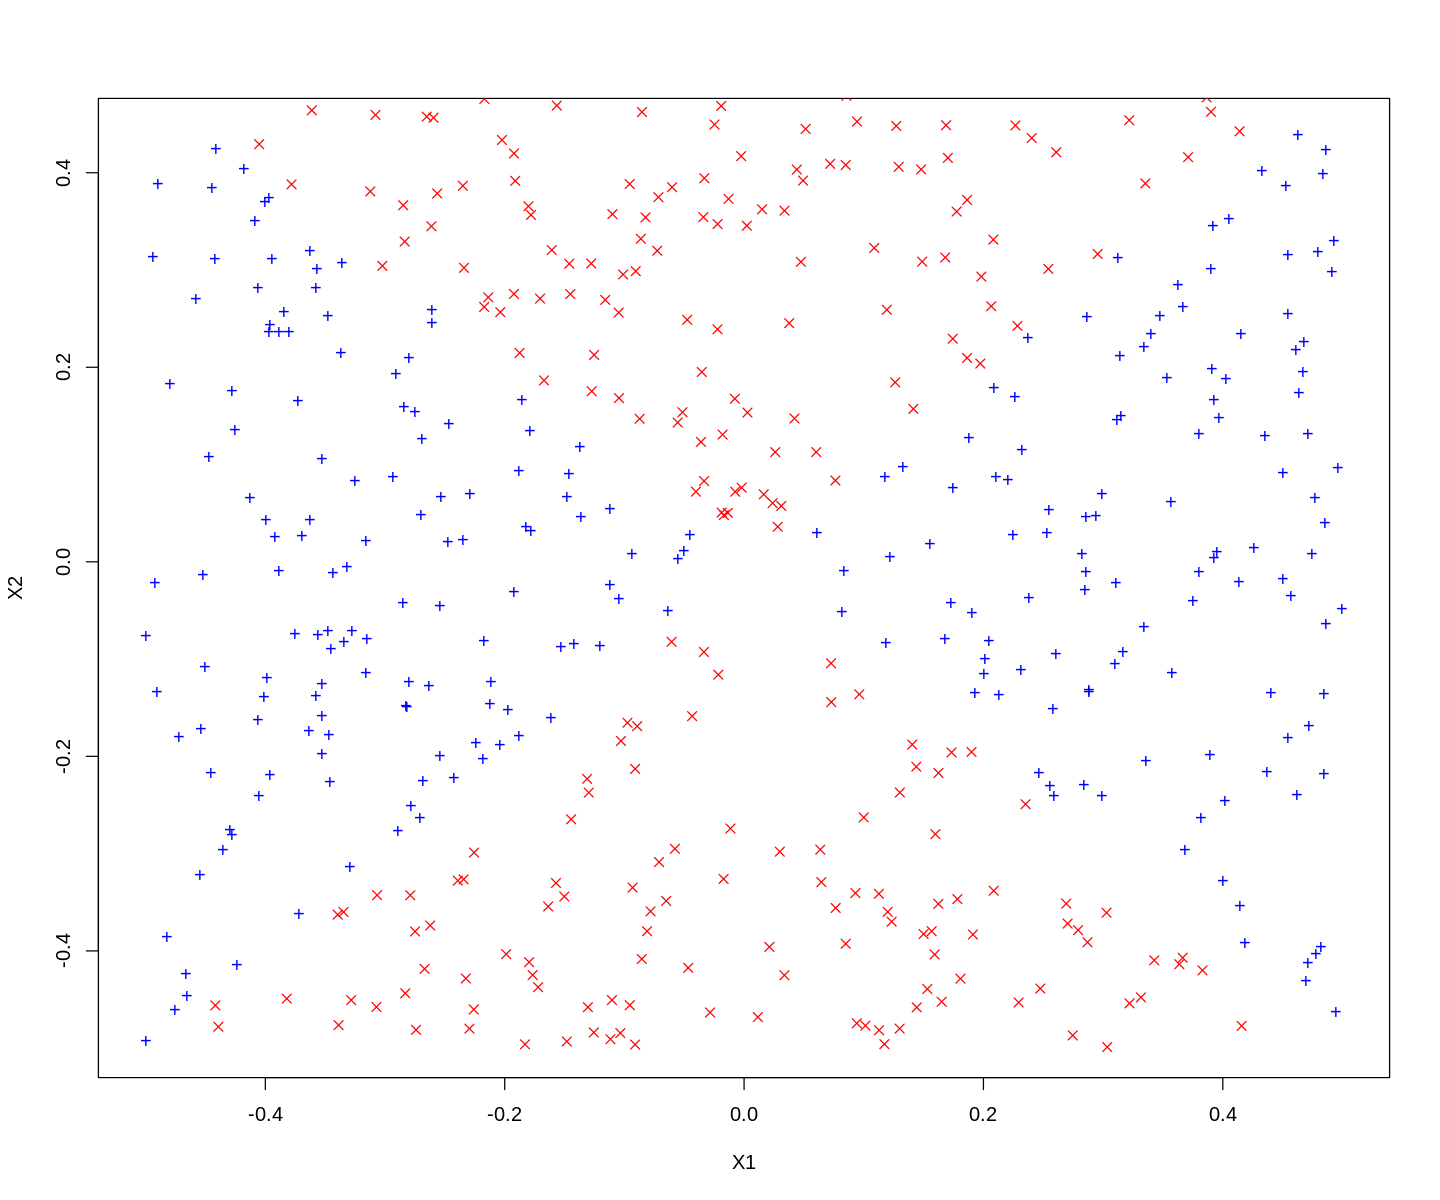

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

log_model_non_linear_prob=predict(log_model_non_linear_fit,df,type="response")
log_model_non_linear_pred=ifelse(log_model_non_linear_prob > 0.5,1,0)
pos_data=df[log_model_non_linear_pred == 1,]
neg_data=df[log_model_non_linear_pred == 0,]
plot(pos_data$x1,pos_data$x2,col="blue",xlab="X1",ylab="X2",pch="+")
points(neg_data$x1,neg_data$x2,col="red",pch=4)

In [ ]:
# Logistic Regression Non-Linear Confusion Matrix - Train
print(table(df[,"y"],log_model_non_linear_pred))

   log_model_non_linear_pred
      0   1
  0 244   0
  1   0 256


In [ ]:
# Logistic Regression Non-Linear Miss Classification Rate - Train
round((1 - ( (244 + 256) / (244 + 256)))*100,2)

[1] 0

###### (g)

In [ ]:
# Linear SVM
svm_linear_fit=svm(as.factor(y) ~ x1 + x2,data=df,kernel="linear",cost=10)
summary(svm_linear_fit)


Call:
svm(formula = as.factor(y) ~ x1 + x2, data = df, kernel = "linear", 
    cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  494

 ( 250 244 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
svm_linear_fit


Call:
svm(formula = as.factor(y) ~ x1 + x2, data = df, kernel = "linear", 
    cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  494


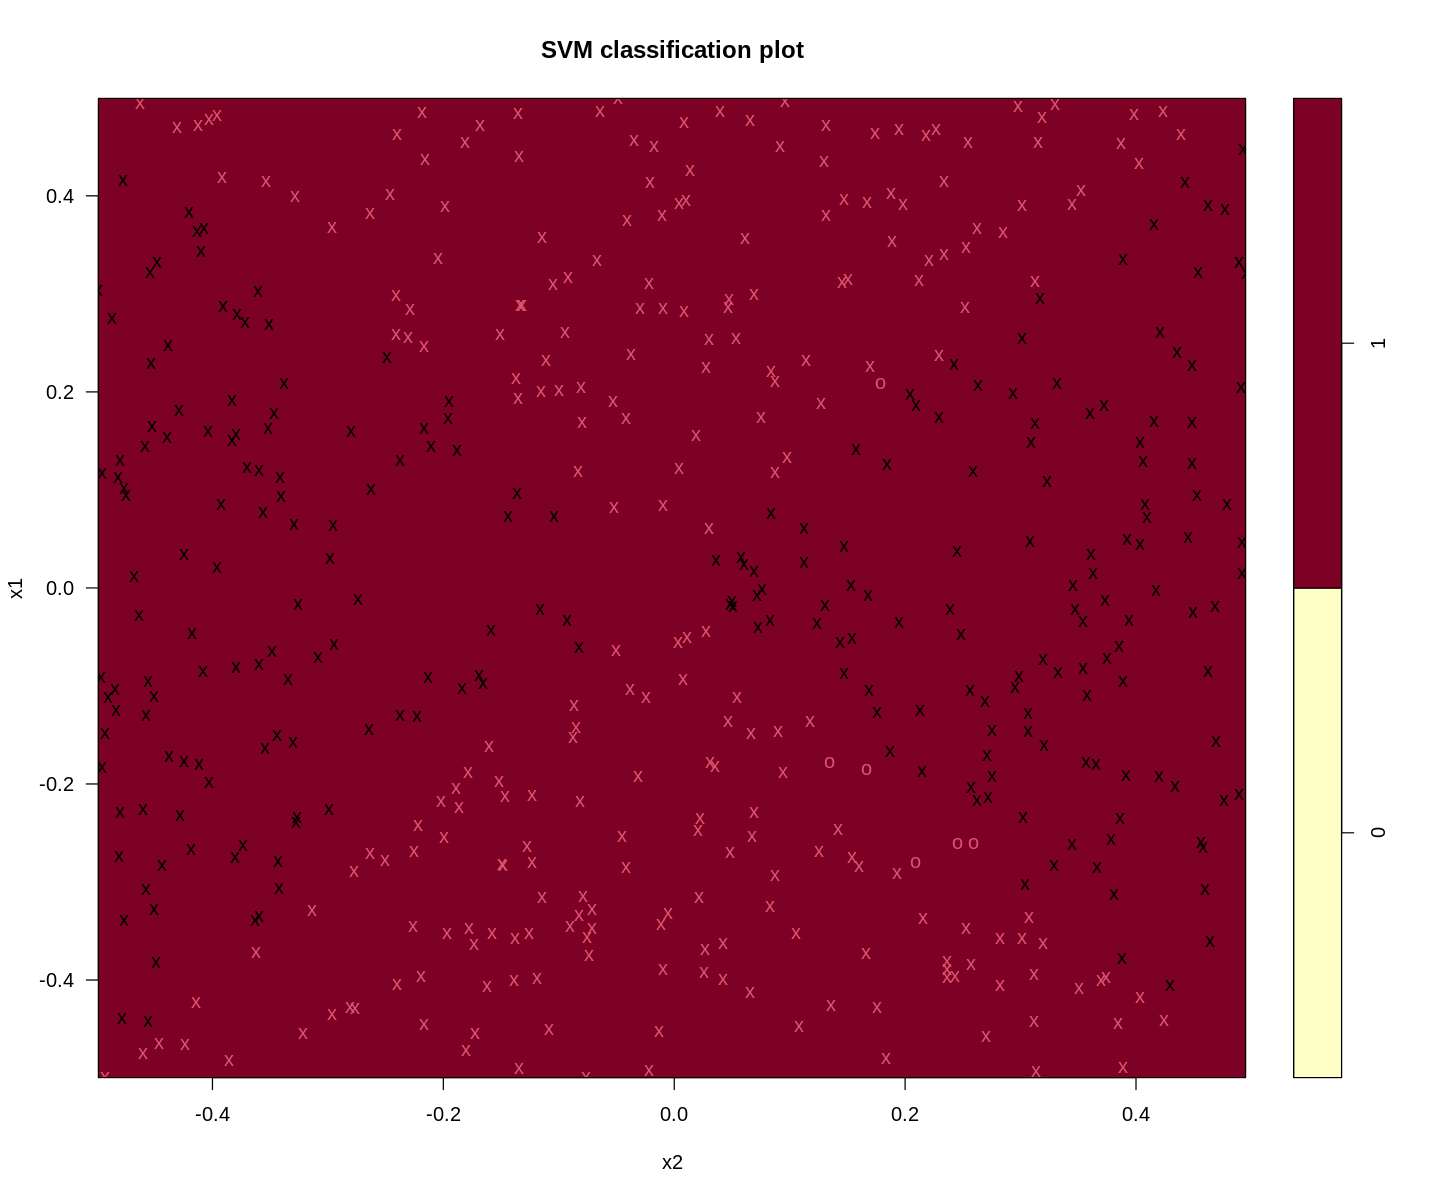

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

plot(svm_linear_fit,df)

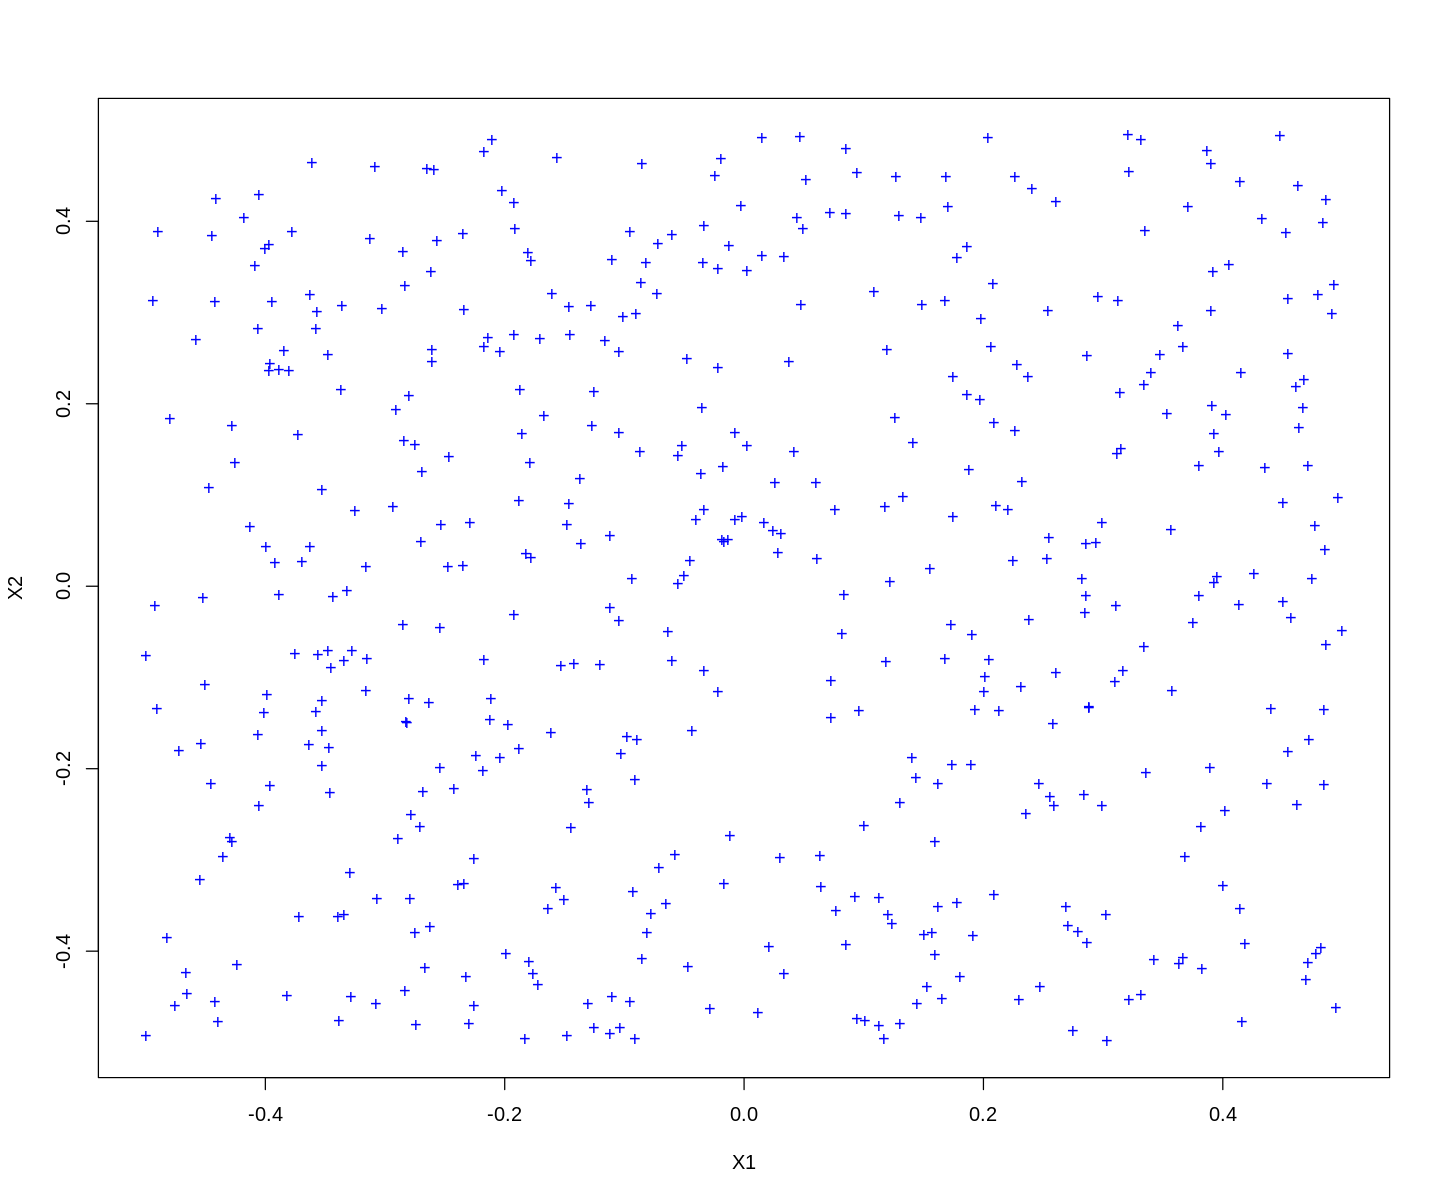

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

svm_linear_pred=predict(svm_linear_fit,df)
pos_data=df[svm_linear_pred == 1,]
neg_data=df[svm_linear_pred == 0,]
plot(pos_data$x1,pos_data$x2,col="blue",xlab="X1",ylab="X2",pch="+")
points(neg_data$x1,neg_data$x2,col="red",pch=4)

In [ ]:
# Linear SVM Confusion Matrix - Train
print(table(df[,"y"],predict(svm_linear_fit,df)))

   
      0   1
  0   0 244
  1   0 256


In [ ]:
# Linear SVM Miss Classification Rate - Train
round((1 - ( (256) / (244 + 256)))*100,2)

[1] 48.8

###### (h)

In [ ]:
# Polynomial SVM
svm_polynomial_fit=svm(as.factor(y) ~ x1 + x2,data=df,kernel="polynomial",cost=10)
summary(svm_polynomial_fit)


Call:
svm(formula = as.factor(y) ~ x1 + x2, data = df, kernel = "polynomial", 
    cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  484

 ( 243 241 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
svm_polynomial_fit


Call:
svm(formula = as.factor(y) ~ x1 + x2, data = df, kernel = "polynomial", 
    cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  484


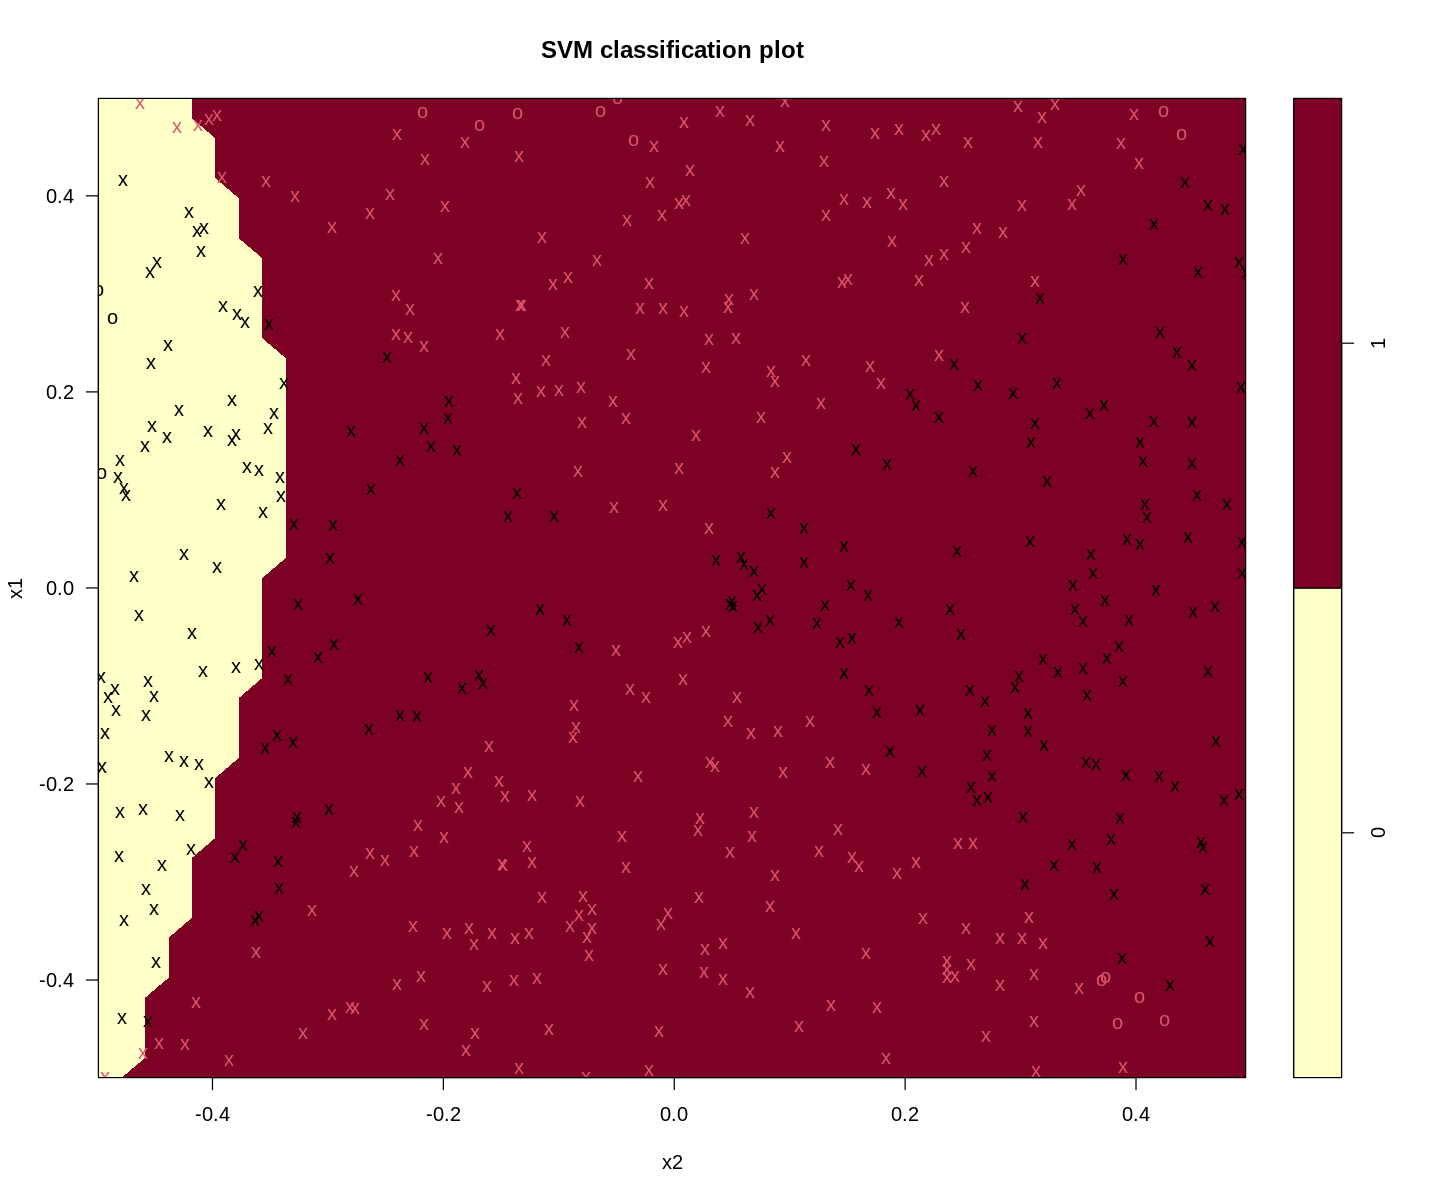

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

plot(svm_polynomial_fit,df)

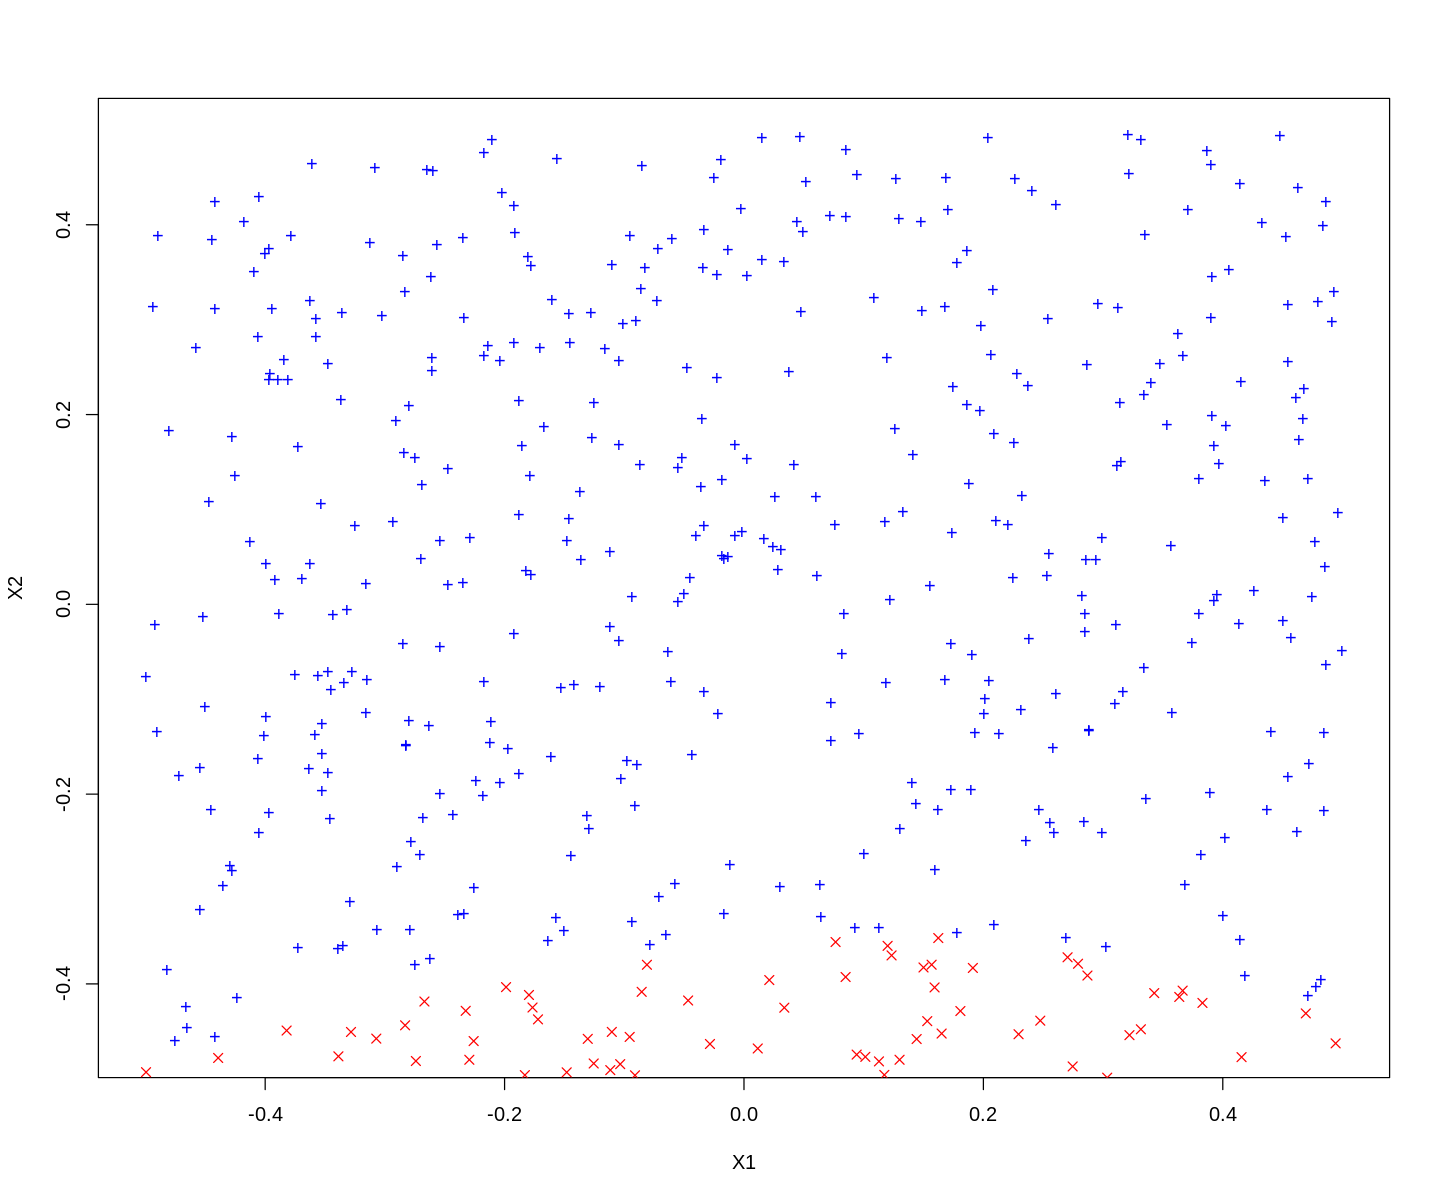

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

svm_polynomial_pred=predict(svm_polynomial_fit,df)
pos_data=df[svm_polynomial_pred == 1,]
neg_data=df[svm_polynomial_pred == 0,]
plot(pos_data$x1,pos_data$x2,col="blue",xlab="X1",ylab="X2",pch="+")
points(neg_data$x1,neg_data$x2,col="red",pch=4)

In [ ]:
# Polynomial SVM Confusion Matrix - Train
print(table(df[,"y"],predict(svm_polynomial_fit,df)))

   
      0   1
  0  63 181
  1   3 253


In [ ]:
# Polynomial SVM Miss Classification Rate - Train
round((1 - ( (63 + 253) / (63 + 181 + 3 + 253)))*100,2)

[1] 36.8

In [ ]:
# Radial SVM
svm_radial_fit=svm(as.factor(y) ~ x1 + x2,data=df,kernel="radial",cost=10,gamma=1)
summary(svm_radial_fit)


Call:
svm(formula = as.factor(y) ~ x1 + x2, data = df, kernel = "radial", 
    cost = 10, gamma = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  71

 ( 37 34 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
svm_radial_fit


Call:
svm(formula = as.factor(y) ~ x1 + x2, data = df, kernel = "radial", 
    cost = 10, gamma = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  71


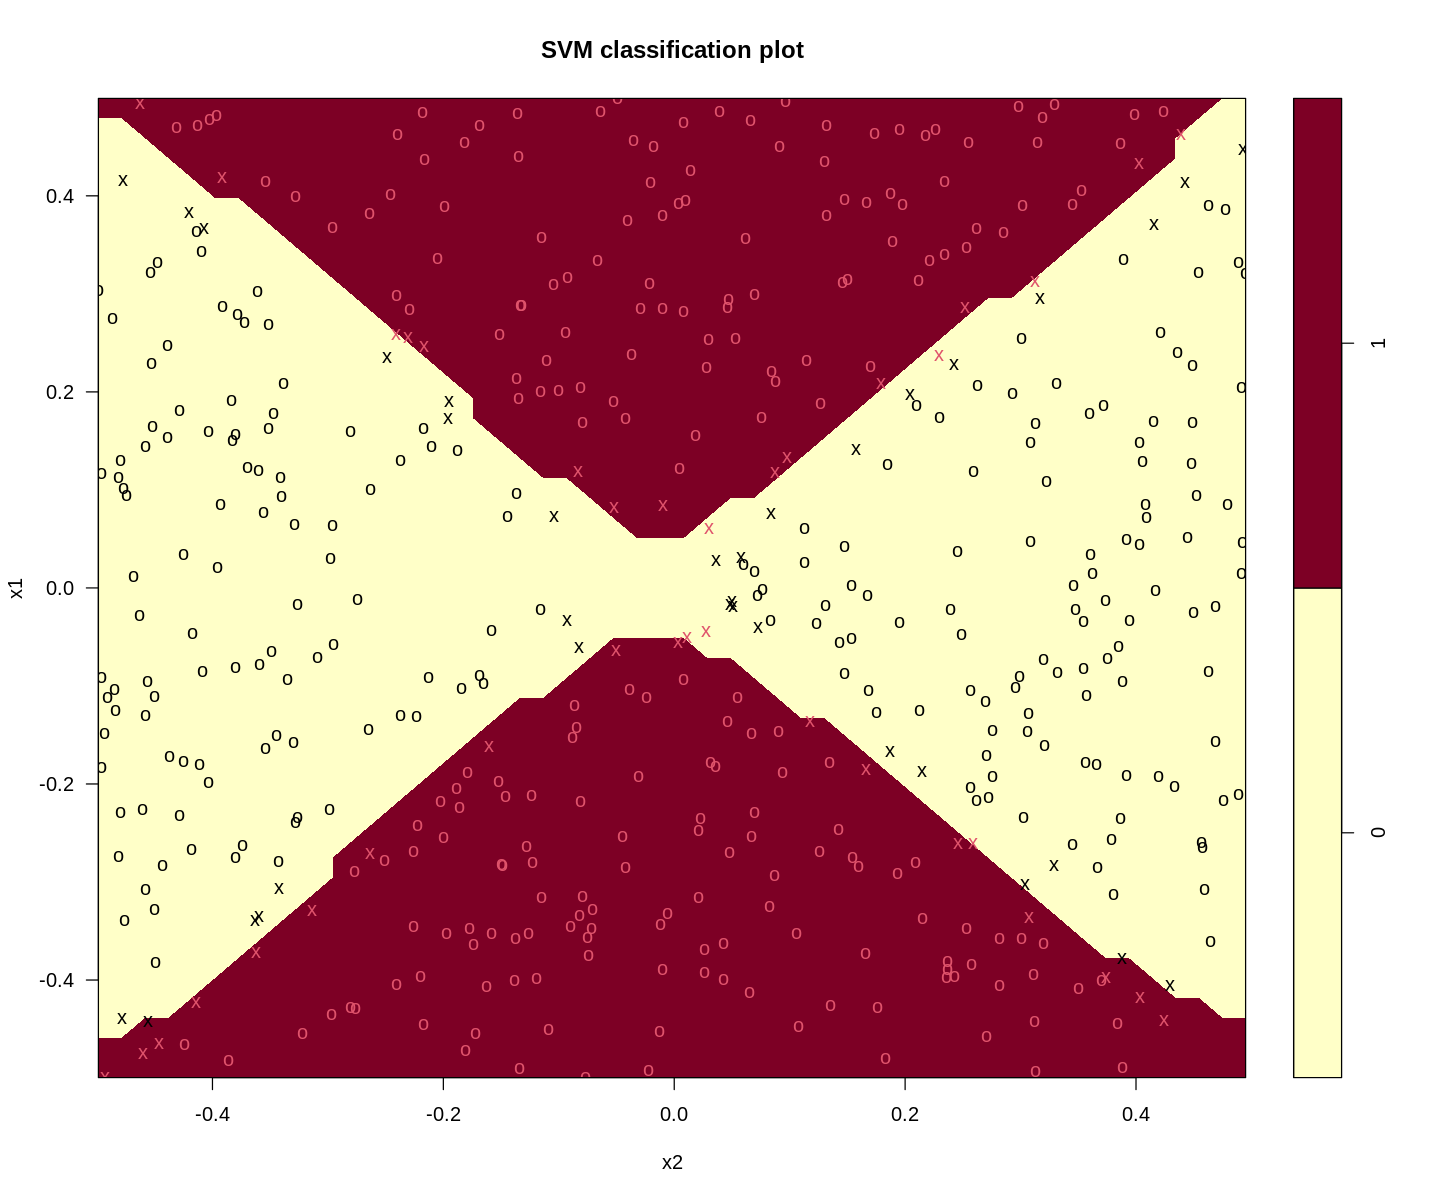

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

plot(svm_radial_fit,df)

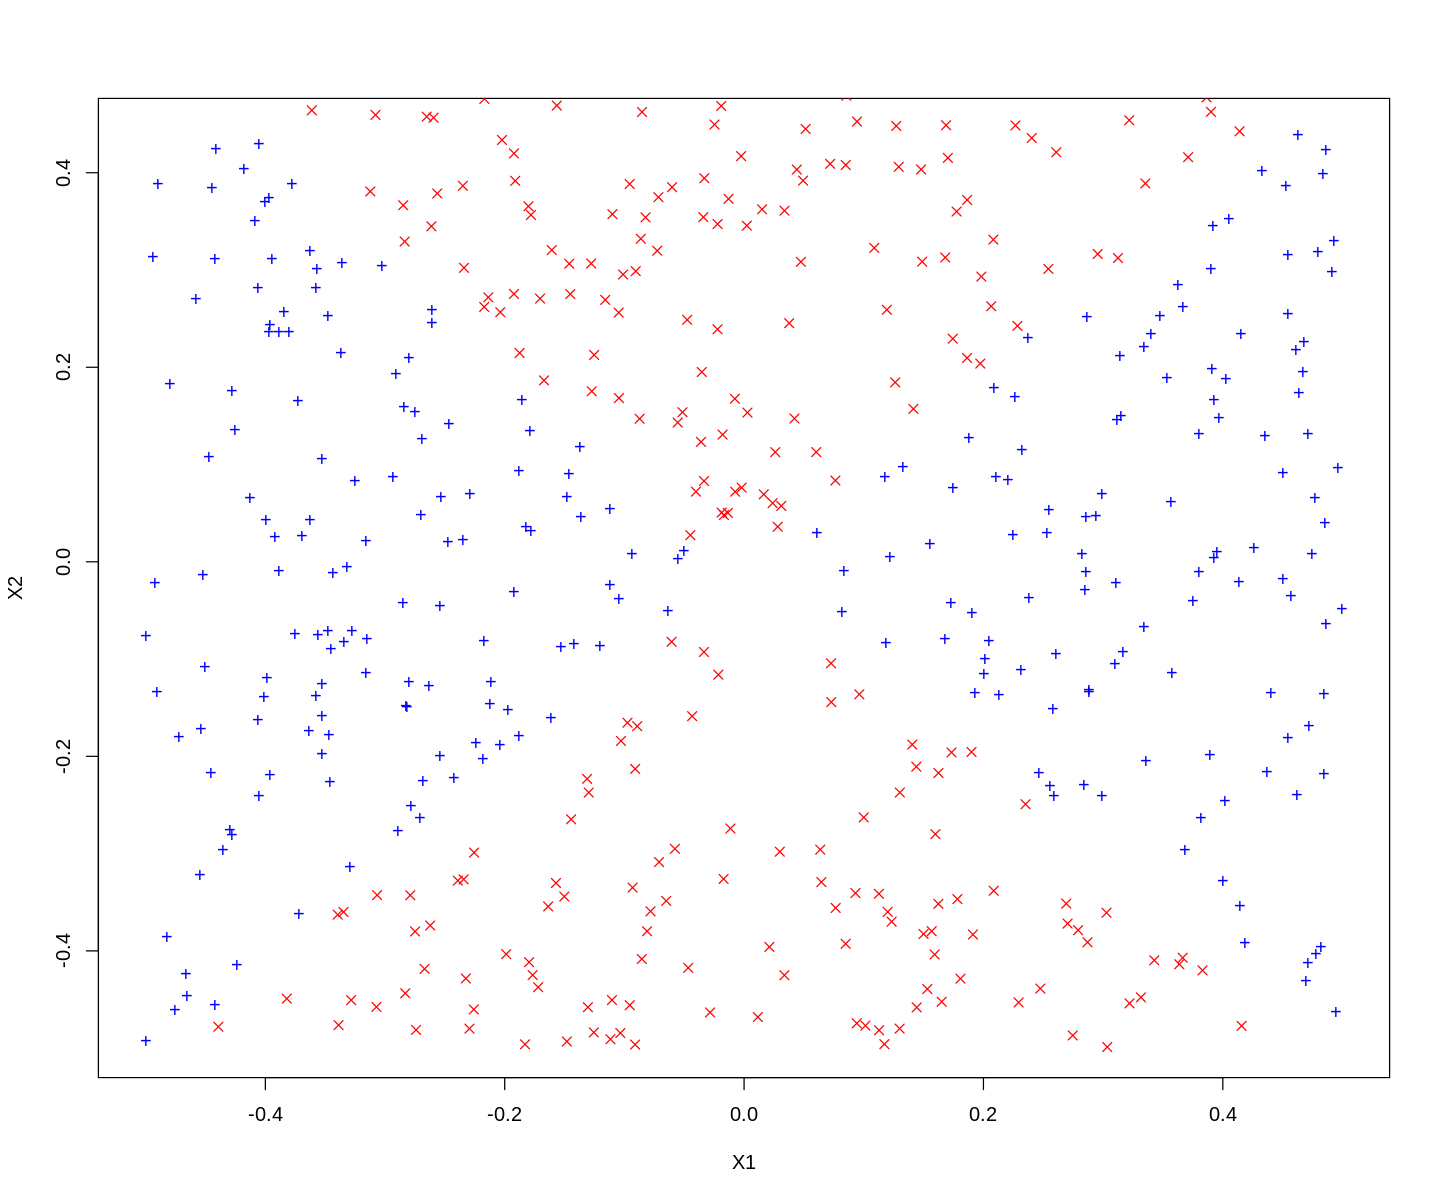

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

svm_radial_pred=predict(svm_radial_fit,df)
pos_data=df[svm_radial_pred == 1,]
neg_data=df[svm_radial_pred == 0,]
plot(pos_data$x1,pos_data$x2,col="blue",xlab="X1",ylab="X2",pch="+")
points(neg_data$x1,neg_data$x2,col="red",pch=4)

In [ ]:
# Radial SVM Confusion Matrix - Train
print(table(df[,"y"],predict(svm_radial_fit,df)))

   
      0   1
  0 240   4
  1   2 254


In [ ]:
# Radial SVM Miss Classification Rate - Train
round((1 - ( (240 + 254) / (240 + 4 + 2 + 254)))*100,2)

[1] 1.2

###### (i)

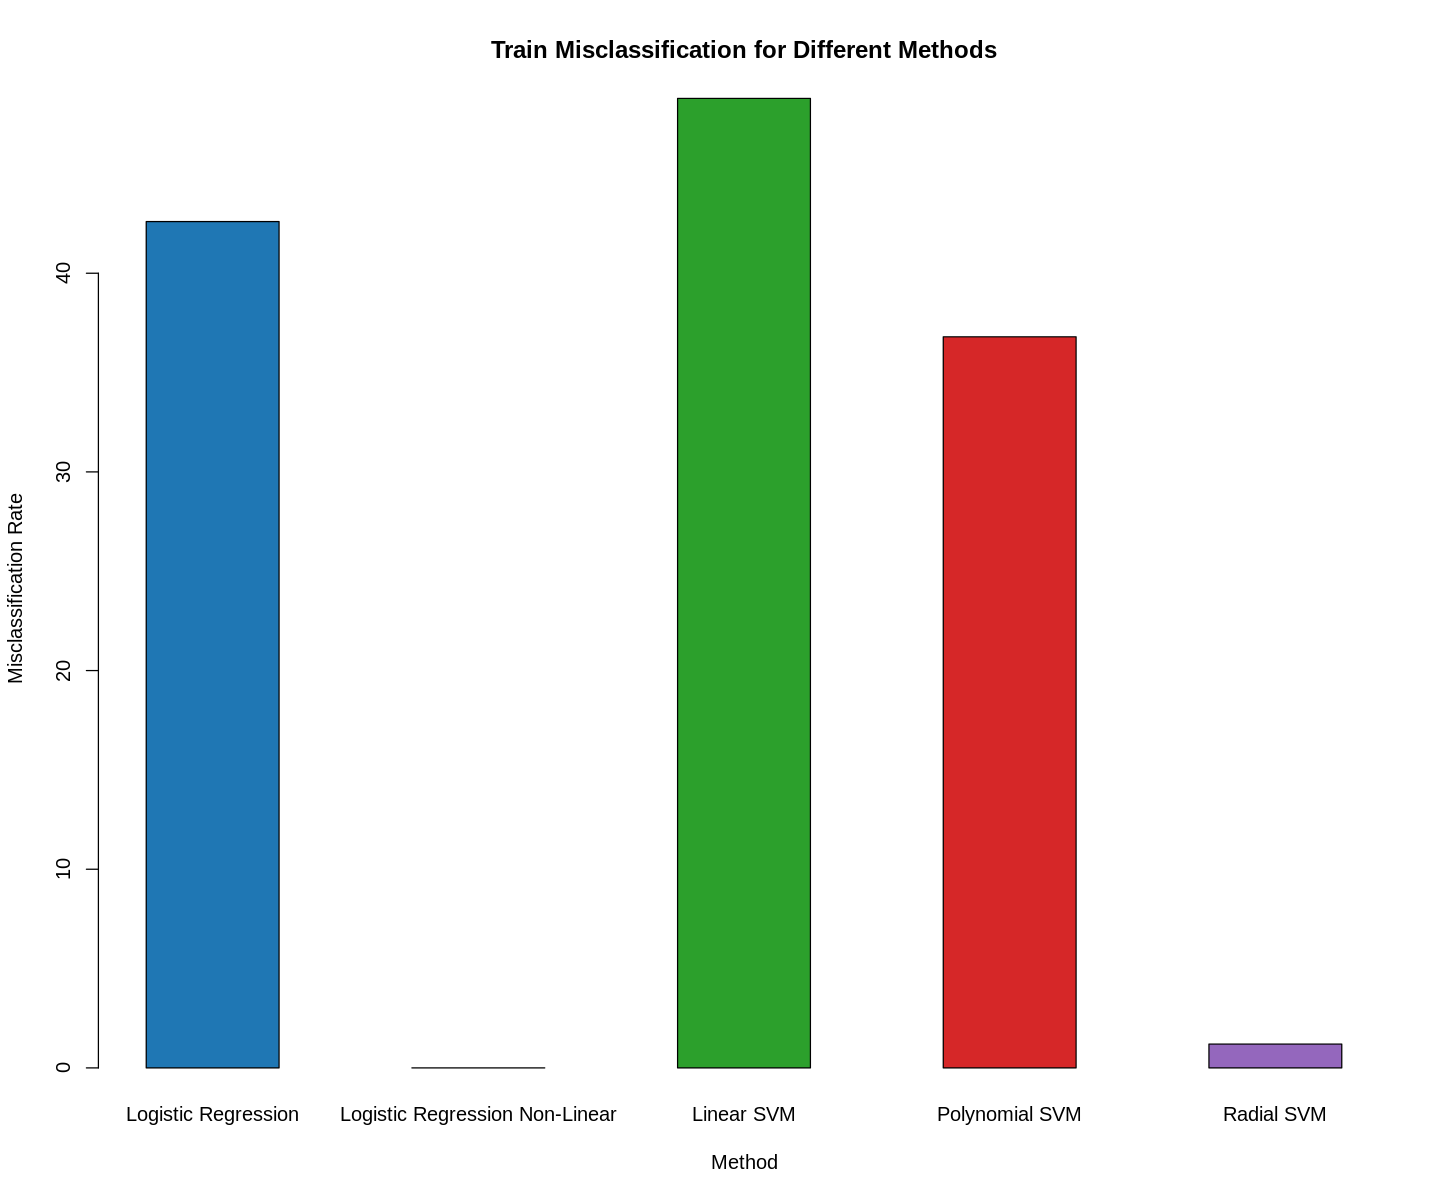

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)

svm_result_df=data.frame(
  Method = c("Logistic Regression", "Logistic Regression Non-Linear", "Linear SVM", "Polynomial SVM", "Radial SVM"),
  Train_Misclassification = c(42.6, 0, 48.8, 36.8, 1.2)
)

barplot(
  t(as.matrix(svm_result_df[,-1])),
  beside = TRUE,
  col = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"),
  names.arg = svm_result_df$Method,
  xlab = "Method",
  ylab = "Misclassification Rate",
  main = "Train Misclassification for Different Methods",
)

##### 10.7 Q10

###### (a)

In [ ]:
install.packages("stats")
library(stats)
set.seed(123)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
x=matrix(rnorm(20*3*50,mean=0,sd=0.001),ncol=50)
x[1:20,2]=1
x[21:40,1]=2
x[21:40,2]=2
x[41:60,1]=1

###### (b)

In [ ]:
pca_output=prcomp(x)
summary(pca_output)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5823 0.001858 0.001718 0.001669 0.001658
Proportion of Variance 0.750 0.2500 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001627 0.001542 0.001463 0.001408 0.001356 0.001313
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     0.001284 0.001257 0.001202 0.001139 0.001129 0.001104
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999990 0.999990 0.999990 0.999990 0.999990 0.999990
                           PC19     PC20     PC21      PC22      PC23 

In [ ]:
pca_output

Standard deviations (1, .., p=50):
 [1] 1.0084760880 0.5822866477 0.0018577175 0.0017176017 0.0016692337
 [6] 0.0016580063 0.0016274825 0.0015422556 0.0014626119 0.0014076465
[11] 0.0013564766 0.0013132921 0.0012836348 0.0012566891 0.0012017659
[16] 0.0011387289 0.0011287565 0.0011039758 0.0010789602 0.0010339172
[21] 0.0010038826 0.0009466235 0.0009252637 0.0009016255 0.0008880047
[26] 0.0008497852 0.0007979188 0.0007850021 0.0007489407 0.0006999992
[31] 0.0006660704 0.0006375016 0.0006101167 0.0005729702 0.0005366043
[36] 0.0005139831 0.0005003762 0.0004683561 0.0004260881 0.0003926947
[41] 0.0003855967 0.0003345540 0.0003208331 0.0002895684 0.0002840065
[46] 0.0002561688 0.0002034676 0.0001648596 0.0001436663 0.0001089367

Rotation (n x k) = (50 x 50):
                PC1           PC2           PC3           PC4           PC5
 [1,]  7.069294e-01  7.072831e-01 -0.0002241107  4.151625e-05 -3.749891e-05
 [2,]  7.072836e-01 -7.069290e-01  0.0001750915  6.705257e-05 -1.813203e-04
 [3,] 

In [ ]:
pca_output$x[,1:2]

PC1,PC2
-0.7072765,-0.7077973111
-0.7070423,-0.7075635227
-0.7057782,-0.7062989686
-0.7068289,-0.7073522551
-0.7067869,-0.7073106792
-0.7056648,-0.7061882344
-0.7065528,-0.7070769936
-0.7077727,-0.7082985534
-0.7073645,-0.7078895228
-0.7071933,-0.7077174737


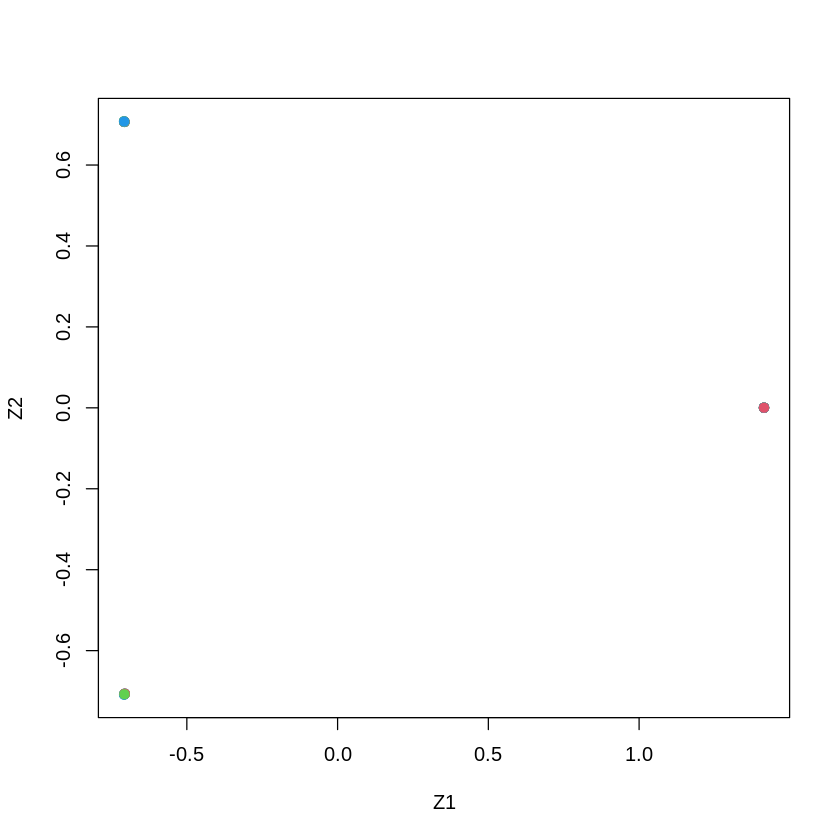

In [ ]:
plot(pca_output$x[,1:2],col=2:4,xlab="Z1",ylab="Z2",pch=19)

###### (c)

In [ ]:
km_3_output=kmeans(x,3,nstart=20)
summary(km_3_output)

             Length Class  Mode   
cluster       60    -none- numeric
centers      150    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [ ]:
km_3_output

K-means clustering with 3 clusters of sizes 20, 20, 20

Cluster means:
          [,1]          [,2]          [,3]          [,4]          [,5]
1 2.0000000000  2.0000000000 -0.0001733363  5.948306e-05  2.094816e-04
2 0.0001416238  1.0000000000 -0.0000383492 -1.335579e-04 -2.324115e-05
3 1.0000000000 -0.0003593805  0.0001668898 -3.834048e-05  3.949425e-04
           [,6]          [,7]          [,8]          [,9]         [,10]
1  5.021726e-05 -1.466458e-04 -3.640754e-05 -0.0002754007 -0.0000406936
2 -3.901232e-05  2.858593e-05  2.065840e-04  0.0002698108  0.0001010186
3 -7.425957e-05 -2.119631e-04  3.012304e-04  0.0002521723 -0.0002485964
          [,11]         [,12]        [,13]         [,14]        [,15]
1 -0.0002010846 -1.507986e-04 4.064904e-04  1.874406e-05 3.797888e-04
2 -0.0002707735 -1.617905e-04 8.075581e-05 -1.449059e-04 3.072856e-04
3  0.0000362264  6.499619e-05 1.220312e-04 -2.415699e-04 3.700029e-06
          [,16]         [,17]        [,18]         [,19]         [,20]
1  0.0

In [ ]:
table(km_3_output$cluster,c(rep(1,20),rep(2,20),rep(3,20)))

   
     1  2  3
  1  0 20  0
  2 20  0  0
  3  0  0 20

###### (d)

In [ ]:
km_2_output=kmeans(x,2,nstart=20)
summary(km_2_output)

             Length Class  Mode   
cluster       60    -none- numeric
centers      100    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [ ]:
km_2_output

K-means clustering with 2 clusters of sizes 20, 40

Cluster means:
       [,1]      [,2]          [,3]          [,4]         [,5]          [,6]
1 2.0000000 2.0000000 -1.733363e-04  5.948306e-05 0.0002094816  5.021726e-05
2 0.5000708 0.4998203  6.427032e-05 -8.594918e-05 0.0001858507 -5.663594e-05
           [,7]          [,8]          [,9]         [,10]         [,11]
1 -1.466458e-04 -3.640754e-05 -0.0002754007 -4.069360e-05 -0.0002010846
2 -9.168858e-05  2.539072e-04  0.0002609916 -7.378892e-05 -0.0001172735
          [,12]        [,13]         [,14]        [,15]        [,16]
1 -1.507986e-04 0.0004064904  1.874406e-05 0.0003797888 1.246399e-04
2 -4.839714e-05 0.0001013935 -1.932379e-04 0.0001554928 1.402874e-05
          [,17]        [,18]         [,19]         [,20]         [,21]
1  7.082300e-05 3.012403e-05 -1.261826e-06 -1.453205e-04 -2.079398e-04
2 -3.309919e-05 1.393166e-04  2.230016e-05  2.188203e-05  4.317470e-06
          [,22]         [,23]         [,24]         [,25]        [

In [ ]:
table(km_2_output$cluster,c(rep(1,20),rep(2,20),rep(3,20)))

   
     1  2  3
  1  0 20  0
  2 20  0 20

###### (e)

In [ ]:
km_4_output=kmeans(x,4,nstart=20)
summary(km_4_output)

             Length Class  Mode   
cluster       60    -none- numeric
centers      200    -none- numeric
totss          1    -none- numeric
withinss       4    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           4    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [ ]:
km_4_output

K-means clustering with 4 clusters of sizes 8, 20, 12, 20

Cluster means:
          [,1]          [,2]          [,3]          [,4]          [,5]
1 1.0000000000 -0.0004160859  0.0008703514  2.226209e-04 -7.325791e-06
2 2.0000000000  2.0000000000 -0.0001733363  5.948306e-05  2.094816e-04
3 1.0000000000 -0.0003215768 -0.0003020846 -2.123147e-04  6.631214e-04
4 0.0001416238  1.0000000000 -0.0000383492 -1.335579e-04 -2.324115e-05
           [,6]          [,7]          [,8]          [,9]         [,10]
1 -9.341944e-04 -5.676621e-05 -1.140556e-04 -0.0001705292  0.0001393440
2  5.021726e-05 -1.466458e-04 -3.640754e-05 -0.0002754007 -0.0000406936
3  4.990303e-04 -3.154277e-04  5.780878e-04  0.0005339734 -0.0005072234
4 -3.901232e-05  2.858593e-05  2.065840e-04  0.0002698108  0.0001010186
          [,11]         [,12]         [,13]         [,14]         [,15]
1  0.0003553200  7.848231e-05 -3.058524e-04 -3.190501e-06  0.0002758207
2 -0.0002010846 -1.507986e-04  4.064904e-04  1.874406e-05  0.000379

In [ ]:
table(km_4_output$cluster,c(rep(1,20),rep(2,20),rep(3,20)))

   
     1  2  3
  1  0  0  8
  2  0 20  0
  3  0  0 12
  4 20  0  0

###### (f)

In [ ]:
km_3_pca_output=kmeans(pca_output$x[,1:2],3,nstart=20)
summary(km_3_pca_output)

             Length Class  Mode   
cluster      60     -none- numeric
centers       6     -none- numeric
totss         1     -none- numeric
withinss      3     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          3     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

In [ ]:
km_3_pca_output

K-means clustering with 3 clusters of sizes 20, 20, 20

Cluster means:
         PC1          PC2
1 -0.7067785 -0.707302439
2  1.4142654  0.000236067
3 -0.7074869  0.707066372

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 1.797711e-05 4.571144e-11 9.323590e-06
 (between_SS / total_SS = 100.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [ ]:
table(km_3_pca_output$cluster,c(rep(1,20),rep(2,20),rep(3,20)))

   
     1  2  3
  1 20  0  0
  2  0 20  0
  3  0  0 20

###### (g)

In [ ]:
km_scaled_3_output=kmeans(scale(x),3,nstart=20)
summary(km_scaled_3_output)

             Length Class  Mode   
cluster       60    -none- numeric
centers      150    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [ ]:
km_scaled_3_output

K-means clustering with 3 clusters of sizes 13, 24, 23

Cluster means:
        [,1]       [,2]       [,3]        [,4]        [,5]       [,6]
1 -0.1869073 -0.4670342 -0.0285322  0.20244350 -0.18394432 -0.3212735
2 -0.1516965 -0.1518502 -0.1369082 -0.04466254  0.15708110  0.3330718
3  0.2639352  0.4224282  0.1589876 -0.06782020 -0.05994219 -0.1659638
         [,7]       [,8]       [,9]      [,10]      [,11]      [,12]      [,13]
1 -0.67316523  0.2439458  0.2657201 -0.3041286  0.1158625  0.4382480  0.1683716
2 -0.01639648  0.1911209  0.3948557 -0.1044346 -0.2412934 -0.1295240  0.3053698
3  0.39759407 -0.3373130 -0.5622130  0.2808740  0.1862969 -0.1125499 -0.4138133
       [,14]      [,15]      [,16]       [,17]       [,18]      [,19]
1 -0.2930064 -0.4564940 -0.6786133 -0.23562965  0.04055868  0.6504871
2 -0.2472242 -0.4282816  0.5007142 -0.09925188  0.31503058 -0.6304167
3  0.4235853  0.7049209 -0.1389204  0.23674915 -0.35165204  0.2901595
       [,20]      [,21]       [,22]       [,23]  

In [ ]:
table(km_scaled_3_output$cluster,c(rep(1,20),rep(2,20),rep(3,20)))

   
     1  2  3
  1  4  2  7
  2  9  6  9
  3  7 12  4